# Extract features

Here, we want to extract features from the seismic signals

In [1]:
from tqdm.notebook import tqdm

from obspy import ObsPyException

import analysis
import catalog
import energy

tqdm.pandas()
catalog.display_parameters()

## Load the database

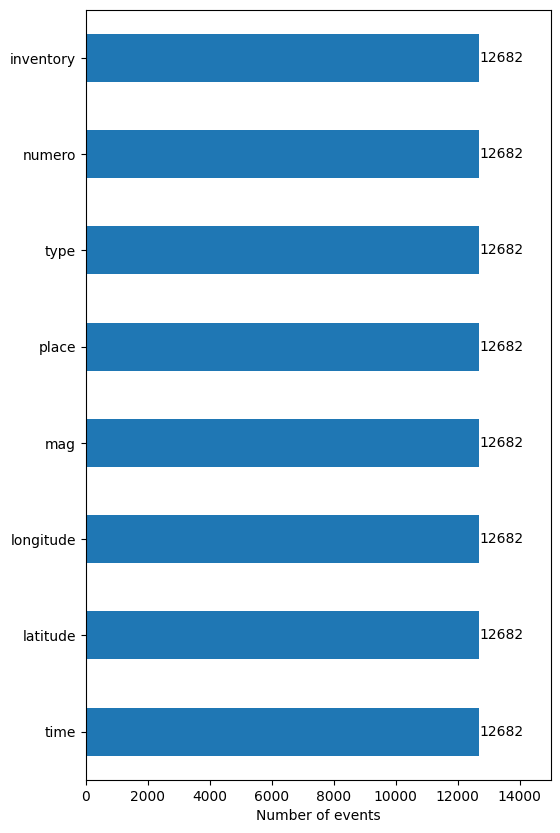

In [2]:
dataframe = catalog.load("data/new_dataframe_with_inventory_cleaned.pickle")

catalog.open_plot(dataframe, pos_number=0.04, xlim=15000)

## Extract features

After detecting the seismic signal with the detection method, features will be extracted from the spectrogram and the energy envelope of the signals.

In [ ]:
## Loop over all events
for event_index in tqdm(dataframe["numero"], total=len(dataframe)):
        
    #if event_index == 0: ## Uncomment this line if you want to see a specific event

        print("-------------------------")
        print("Event number", event_index)
        print("-------------------------")
        
        try:
            ## Filter the stream
            _, trace = analysis.filter_stream(event_index, freq_HP=9, freq_LP=0.5, max_percentage=0.3)
        
            # The detection method
            time_start_detection, data_start_detection, trimmed_time, trimmed_data, time_raw, data_raw, upper_threshold, lower_threshold = analysis.detection_on_one_trace(trace, dataframe, event_index)

            ## Extract features from the spectrogram and save them in a dataframe for each events
            analysis.plot_spectre(trace, dataframe, trimmed_data, event_index, conserv_result=True)

            ## Extract features from the energy envelope and save them in a dataframe for each events
            energy.compute(dataframe, trace, event_index)

        except (IndexError, ObsPyException, ValueError):
            print("An error occurred in event", event_index)

  0%|          | 0/12682 [00:00<?, ?it/s]

-------------------------
Event number 1
-------------------------
Detection on event 1
-------------------------
Event number 5
-------------------------
Detection on event 5
-------------------------
Event number 11
-------------------------
Detection on event 11
-------------------------
Event number 12
-------------------------
Detection on event 12
-------------------------
Event number 13
-------------------------
Detection on event 13
-------------------------
Event number 15
-------------------------
Detection on event 15
-------------------------
Event number 18
-------------------------
Detection on event 18
-------------------------
Event number 21
-------------------------
Detection on event 21
-------------------------
Event number 29
-------------------------
Detection on event 29
-------------------------
Event number 34
-------------------------
Detection on event 34
-------------------------
Event number 38
-------------------------
Detection on event 38
--------------

C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 113
An error occurred in event 113
-------------------------
Event number 114
-------------------------
Detection on event 114
-------------------------
Event number 115
-------------------------
Detection on event 115
-------------------------
Event number 116
-------------------------
Detection on event 116
-------------------------
Event number 118
-------------------------
No detection on event 118
An error occurred in event 118
-------------------------
Event number 120
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 120
An error occurred in event 120
-------------------------
Event number 121
-------------------------
No detection on event 121
An error occurred in event 121
-------------------------
Event number 122
-------------------------
Detection on event 122
-------------------------
Event number 125
-------------------------
No detection on event 125
An error occurred in event 125
-------------------------
Event number 126
-------------------------
No detection on event 126
An error occurred in event 126
-------------------------
Event number 128
-------------------------
Detection on event 128
-------------------------
Event number 130
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 130
An error occurred in event 130
-------------------------
Event number 132
-------------------------
No detection on event 132
An error occurred in event 132
-------------------------
Event number 133
-------------------------
No detection on event 133
An error occurred in event 133
-------------------------
Event number 134
-------------------------
Detection on event 134
-------------------------
Event number 136
-------------------------
Detection on event 136
-------------------------
Event number 137
-------------------------
No detection on event 137
An error occurred in event 137
-------------------------
Event number 138
-------------------------
No detection on event 138
An error occurred in event 138
-------------------------
Event number 140
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 140
An error occurred in event 140
-------------------------
Event number 141
-------------------------
Detection on event 141
-------------------------
Event number 145
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 145
An error occurred in event 145
-------------------------
Event number 147
-------------------------
Detection on event 147
-------------------------
Event number 150
-------------------------
No detection on event 150
An error occurred in event 150
-------------------------
Event number 151
-------------------------
No detection on event 151
An error occurred in event 151
-------------------------
Event number 153
-------------------------
Detection on event 153
-------------------------
Event number 154
-------------------------
Detection on event 154
-------------------------
Event number 155
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 155
An error occurred in event 155
-------------------------
Event number 160
-------------------------
Detection on event 160
-------------------------
Event number 161
-------------------------
No detection on event 161
An error occurred in event 161
-------------------------
Event number 162
-------------------------
No detection on event 162
An error occurred in event 162
-------------------------
Event number 163
-------------------------
Detection on event 163
-------------------------
Event number 168
-------------------------
No detection on event 168
An error occurred in event 168
-------------------------
Event number 170
-------------------------
No detection on event 170
An error occurred in event 170
-------------------------
Event number 172
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Detection on event 172
-------------------------
Event number 175
-------------------------
No detection on event 175
An error occurred in event 175
-------------------------
Event number 177
-------------------------
Detection on event 177
-------------------------
Event number 179
-------------------------
Detection on event 179
-------------------------
Event number 180
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Detection on event 180
-------------------------
Event number 182
-------------------------
Detection on event 182
-------------------------
Event number 183
-------------------------
No detection on event 183
An error occurred in event 183
-------------------------
Event number 184
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Detection on event 184
-------------------------
Event number 185
-------------------------
Detection on event 185
-------------------------
Event number 187
-------------------------
Detection on event 187
-------------------------
Event number 189
-------------------------
Detection on event 189
-------------------------
Event number 190
-------------------------
No detection on event 190
An error occurred in event 190
-------------------------
Event number 192
-------------------------
Detection on event 192
-------------------------
Event number 193
-------------------------
Detection on event 193
-------------------------
Event number 194
-------------------------
Detection on event 194


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


-------------------------
Event number 195
-------------------------
Detection on event 195
-------------------------
Event number 196
-------------------------
Detection on event 196
-------------------------
Event number 197
-------------------------
No detection on event 197
An error occurred in event 197
-------------------------
Event number 198
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Detection on event 198
-------------------------
Event number 200
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 200
An error occurred in event 200
-------------------------
Event number 201
-------------------------
No detection on event 201
An error occurred in event 201
-------------------------
Event number 203
-------------------------
No detection on event 203
An error occurred in event 203
-------------------------
Event number 208
-------------------------
No detection on event 208
An error occurred in event 208
-------------------------
Event number 210
-------------------------
No detection on event 210
An error occurred in event 210
-------------------------
Event number 211
-------------------------
No detection on event 211
An error occurred in event 211
-------------------------
Event number 212
-------------------------
No detection on event 212
An error occurred in event 212
-------------------------
Event number 214
-------------------------
Detection on event 214
-------------------------
Event number 215
-------------------------
No detection on event 215


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\num

No detection on event 222
An error occurred in event 222
-------------------------
Event number 226
-------------------------
No detection on event 226
An error occurred in event 226
-------------------------
Event number 227
-------------------------
No detection on event 227
An error occurred in event 227
-------------------------
Event number 228
-------------------------
Detection on event 228
-------------------------
Event number 229
-------------------------
No detection on event 229
An error occurred in event 229
-------------------------
Event number 230
-------------------------
No detection on event 230
An error occurred in event 230
-------------------------
Event number 232
-------------------------
No detection on event 232
An error occurred in event 232
-------------------------
Event number 233
-------------------------
Detection on event 233
-------------------------
Event number 234
-------------------------
Detection on event 234
-------------------------
Event numbe

C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 237
An error occurred in event 237
-------------------------
Event number 238
-------------------------
No detection on event 238
An error occurred in event 238
-------------------------
Event number 239
-------------------------
Detection on event 239
-------------------------
Event number 240
-------------------------
An error occurred in event 240
-------------------------
Event number 241
-------------------------
No detection on event 241
An error occurred in event 241
-------------------------
Event number 242
-------------------------
No detection on event 242
An error occurred in event 242
-------------------------
Event number 243
-------------------------
Detection on event 243
-------------------------
Event number 245
-------------------------
Detection on event 245
-------------------------
Event number 246
-------------------------
Detection on event 246
-------------------------
Event number 248
-------------------------
Detection on event 248
-----

C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Detection on event 264
-------------------------
Event number 266
-------------------------
No detection on event 266
An error occurred in event 266
-------------------------
Event number 267
-------------------------
Detection on event 267
-------------------------
Event number 268
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 268
An error occurred in event 268
-------------------------
Event number 269
-------------------------
No detection on event 269
An error occurred in event 269
-------------------------
Event number 270
-------------------------
No detection on event 270
An error occurred in event 270
-------------------------
Event number 272
-------------------------
No detection on event 272
An error occurred in event 272
-------------------------
Event number 273
-------------------------
No detection on event 273
An error occurred in event 273
-------------------------
Event number 276
-------------------------
No detection on event 276
An error occurred in event 276
-------------------------
Event number 279
-------------------------
No detection on event 279
An error occurred in event 279
-------------------------
Event number 284
-------------------------
No detection on event 284
An error occurred in event 284
-------------------------
Event number 286
------------------

C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 288
An error occurred in event 288
-------------------------
Event number 289
-------------------------
Detection on event 289
-------------------------
Event number 291
-------------------------
Detection on event 291
-------------------------
Event number 295
-------------------------
Detection on event 295
-------------------------
Event number 296
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 296
An error occurred in event 296
-------------------------
Event number 297
-------------------------
No detection on event 297
An error occurred in event 297
-------------------------
Event number 299
-------------------------
Detection on event 299
-------------------------
Event number 300
-------------------------
Detection on event 300
-------------------------
Event number 302
-------------------------
No detection on event 302
An error occurred in event 302
-------------------------
Event number 303
-------------------------
No detection on event 303
An error occurred in event 303
-------------------------
Event number 305
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 305
An error occurred in event 305
-------------------------
Event number 306
-------------------------
No detection on event 306
An error occurred in event 306
-------------------------
Event number 307
-------------------------
No detection on event 307
An error occurred in event 307
-------------------------
Event number 308
-------------------------
Detection on event 308
-------------------------
Event number 309
-------------------------
No detection on event 309
An error occurred in event 309
-------------------------
Event number 310
-------------------------
No detection on event 310
An error occurred in event 310
-------------------------
Event number 311
-------------------------
Detection on event 311
-------------------------
Event number 312
-------------------------
No detection on event 312
An error occurred in event 312
-------------------------
Event number 313
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 313
An error occurred in event 313
-------------------------
Event number 315
-------------------------
No detection on event 315
An error occurred in event 315
-------------------------
Event number 316
-------------------------
Detection on event 316
-------------------------
Event number 317
-------------------------
Detection on event 317
-------------------------
Event number 319
-------------------------
Detection on event 319
-------------------------
Event number 322
-------------------------
No detection on event 322
An error occurred in event 322
-------------------------
Event number 323
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 323
An error occurred in event 323
-------------------------
Event number 324
-------------------------
No detection on event 324
An error occurred in event 324
-------------------------
Event number 325
-------------------------
No detection on event 325
An error occurred in event 325
-------------------------
Event number 326
-------------------------
No detection on event 326
An error occurred in event 326
-------------------------
Event number 329
-------------------------
No detection on event 329
An error occurred in event 329
-------------------------
Event number 330
-------------------------
No detection on event 330
An error occurred in event 330
-------------------------
Event number 331
-------------------------
No detection on event 331
An error occurred in event 331
-------------------------
Event number 333
-------------------------
Detection on event 333
-------------------------
Event number 336
-------------------------
No detection on event 336


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


-------------------------
Event number 338
-------------------------
Detection on event 338
-------------------------
Event number 339
-------------------------
No detection on event 339
An error occurred in event 339
-------------------------
Event number 340
-------------------------
No detection on event 340
An error occurred in event 340
-------------------------
Event number 343
-------------------------
Detection on event 343
-------------------------
Event number 344
-------------------------
Detection on event 344
-------------------------
Event number 345
-------------------------
No detection on event 345
An error occurred in event 345
-------------------------
Event number 346
-------------------------
Detection on event 346
-------------------------
Event number 347
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Detection on event 347
-------------------------
Event number 350
-------------------------
Detection on event 350
-------------------------
Event number 353
-------------------------
Detection on event 353
-------------------------
Event number 355
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 355
An error occurred in event 355
-------------------------
Event number 356
-------------------------
No detection on event 356
An error occurred in event 356
-------------------------
Event number 357
-------------------------
No detection on event 357
An error occurred in event 357
-------------------------
Event number 358
-------------------------
Detection on event 358
-------------------------
Event number 359
-------------------------
Detection on event 359
-------------------------
Event number 360
-------------------------
Detection on event 360
-------------------------
Event number 362
-------------------------
No detection on event 362
An error occurred in event 362
-------------------------
Event number 363
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Detection on event 363
-------------------------
Event number 364
-------------------------
Detection on event 364
-------------------------
Event number 366
-------------------------
Detection on event 366
-------------------------
Event number 367
-------------------------
Detection on event 367
-------------------------
Event number 369
-------------------------
No detection on event 369
An error occurred in event 369
-------------------------
Event number 371
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Detection on event 371
-------------------------
Event number 372
-------------------------
No detection on event 372
An error occurred in event 372
-------------------------
Event number 373
-------------------------
No detection on event 373
An error occurred in event 373
-------------------------
Event number 374
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 374
An error occurred in event 374
-------------------------
Event number 375
-------------------------
Detection on event 375
-------------------------
Event number 376
-------------------------
Detection on event 376
-------------------------
Event number 377
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 377
An error occurred in event 377
-------------------------
Event number 378
-------------------------
No detection on event 378
An error occurred in event 378
-------------------------
Event number 381
-------------------------
No detection on event 381
An error occurred in event 381
-------------------------
Event number 383
-------------------------
Detection on event 383
-------------------------
Event number 388
-------------------------
No detection on event 388
An error occurred in event 388
-------------------------
Event number 390
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 390
An error occurred in event 390
-------------------------
Event number 391
-------------------------
Detection on event 391
-------------------------
Event number 392
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 392
An error occurred in event 392
-------------------------
Event number 393
-------------------------
Detection on event 393
-------------------------
Event number 396
-------------------------
No detection on event 396
An error occurred in event 396
-------------------------
Event number 397
-------------------------
No detection on event 397
An error occurred in event 397
-------------------------
Event number 400
-------------------------
No detection on event 400
An error occurred in event 400
-------------------------
Event number 402
-------------------------
No detection on event 402
An error occurred in event 402
-------------------------
Event number 403
-------------------------
Detection on event 403
-------------------------
Event number 404
-------------------------
Detection on event 404
-------------------------
Event number 407
-------------------------
Detection on event 407
-------------------------
Event number 409
-------------------------
No

C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Detection on event 410
-------------------------
Event number 412
-------------------------
Detection on event 412
-------------------------
Event number 413
-------------------------
Detection on event 413
-------------------------
Event number 414
-------------------------
Detection on event 414
-------------------------
Event number 415
-------------------------
Detection on event 415
-------------------------
Event number 417
-------------------------
No detection on event 417
An error occurred in event 417
-------------------------
Event number 419
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Detection on event 419
-------------------------
Event number 420
-------------------------
No detection on event 420
An error occurred in event 420
-------------------------
Event number 421
-------------------------
No detection on event 421
An error occurred in event 421
-------------------------
Event number 422
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Detection on event 422
-------------------------
Event number 423
-------------------------
No detection on event 423
An error occurred in event 423
-------------------------
Event number 424
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Detection on event 424
-------------------------
Event number 425
-------------------------
Detection on event 425
-------------------------
Event number 427
-------------------------
Detection on event 427
-------------------------
Event number 428
-------------------------
Detection on event 428
-------------------------
Event number 429
-------------------------
No detection on event 429
An error occurred in event 429
-------------------------
Event number 430
-------------------------
No detection on event 430
An error occurred in event 430
-------------------------
Event number 431
-------------------------
No detection on event 431
An error occurred in event 431
-------------------------
Event number 434
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 434
An error occurred in event 434
-------------------------
Event number 435
-------------------------
No detection on event 435
An error occurred in event 435
-------------------------
Event number 436
-------------------------
No detection on event 436
An error occurred in event 436
-------------------------
Event number 437
-------------------------
No detection on event 437
An error occurred in event 437
-------------------------
Event number 438
-------------------------
No detection on event 438
An error occurred in event 438
-------------------------
Event number 439
-------------------------
No detection on event 439
An error occurred in event 439
-------------------------
Event number 440
-------------------------
No detection on event 440
An error occurred in event 440
-------------------------
Event number 441
-------------------------
No detection on event 441
An error occurred in event 441
-------------------------
Event number 442
------------------

C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 448
An error occurred in event 448
-------------------------
Event number 449
-------------------------
Detection on event 449
-------------------------
Event number 450
-------------------------
No detection on event 450
An error occurred in event 450
-------------------------
Event number 451
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 451
An error occurred in event 451
-------------------------
Event number 452
-------------------------
No detection on event 452
An error occurred in event 452
-------------------------
Event number 453
-------------------------
No detection on event 453
An error occurred in event 453
-------------------------
Event number 454
-------------------------
No detection on event 454
An error occurred in event 454
-------------------------
Event number 455
-------------------------
No detection on event 455
An error occurred in event 455
-------------------------
Event number 456
-------------------------
No detection on event 456
An error occurred in event 456
-------------------------
Event number 457
-------------------------
Detection on event 457
-------------------------
Event number 458
-------------------------
Detection on event 458
-------------------------
Event number 459
-------------------------
Detection on event 459
-------------------------
Event numbe

C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Detection on event 466
-------------------------
Event number 467
-------------------------
Detection on event 467
-------------------------
Event number 468
-------------------------
Detection on event 468
-------------------------
Event number 470
-------------------------
No detection on event 470
An error occurred in event 470
-------------------------
Event number 473
-------------------------
Detection on event 473
-------------------------
Event number 474
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 474
An error occurred in event 474
-------------------------
Event number 475
-------------------------
No detection on event 475
An error occurred in event 475
-------------------------
Event number 477
-------------------------
Detection on event 477
-------------------------
Event number 485
-------------------------
No detection on event 485
An error occurred in event 485
-------------------------
Event number 487
-------------------------
Detection on event 487
-------------------------
Event number 490
-------------------------
No detection on event 490
An error occurred in event 490
-------------------------
Event number 491
-------------------------
Detection on event 491
-------------------------
Event number 492
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Detection on event 492
-------------------------
Event number 493
-------------------------
No detection on event 493
An error occurred in event 493
-------------------------
Event number 494
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Detection on event 494
-------------------------
Event number 495
-------------------------
Detection on event 495
-------------------------
Event number 496
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 496
An error occurred in event 496
-------------------------
Event number 497
-------------------------
No detection on event 497
An error occurred in event 497
-------------------------
Event number 499
-------------------------
Detection on event 499
-------------------------
Event number 500
-------------------------
No detection on event 500
An error occurred in event 500
-------------------------
Event number 501
-------------------------
No detection on event 501
An error occurred in event 501
-------------------------
Event number 502
-------------------------
No detection on event 502
An error occurred in event 502
-------------------------
Event number 503
-------------------------
No detection on event 503
An error occurred in event 503
-------------------------
Event number 510
-------------------------
No detection on event 510
An error occurred in event 510
-------------------------
Event number 513
-------------------------
Detection on event 513
---

C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 520
An error occurred in event 520
-------------------------
Event number 522
-------------------------
No detection on event 522
An error occurred in event 522
-------------------------
Event number 524
-------------------------
Detection on event 524
-------------------------
Event number 525
-------------------------
No detection on event 525
An error occurred in event 525
-------------------------
Event number 526
-------------------------
An error occurred in event 526
-------------------------
Event number 527
-------------------------
Detection on event 527
-------------------------
Event number 530
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 530
An error occurred in event 530
-------------------------
Event number 531
-------------------------
Detection on event 531
-------------------------
Event number 532
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 532
An error occurred in event 532
-------------------------
Event number 534
-------------------------
No detection on event 534
An error occurred in event 534
-------------------------
Event number 536
-------------------------
No detection on event 536
An error occurred in event 536
-------------------------
Event number 539
-------------------------
No detection on event 539
An error occurred in event 539
-------------------------
Event number 541
-------------------------
No detection on event 541
An error occurred in event 541
-------------------------
Event number 542
-------------------------
No detection on event 542
An error occurred in event 542
-------------------------
Event number 543
-------------------------
No detection on event 543
An error occurred in event 543
-------------------------
Event number 544
-------------------------
Detection on event 544
-------------------------
Event number 545
-------------------------
Detection on event 545
---

C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Detection on event 548
-------------------------
Event number 549
-------------------------
Detection on event 549
-------------------------
Event number 550
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 550
An error occurred in event 550
-------------------------
Event number 551
-------------------------
No detection on event 551
An error occurred in event 551
-------------------------
Event number 552
-------------------------
Detection on event 552
-------------------------
Event number 553
-------------------------
Detection on event 553
-------------------------
Event number 554
-------------------------
Detection on event 554
-------------------------
Event number 555
-------------------------
No detection on event 555
An error occurred in event 555
-------------------------
Event number 556
-------------------------
Detection on event 556
-------------------------
Event number 558
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 558
An error occurred in event 558
-------------------------
Event number 563
-------------------------
Detection on event 563
-------------------------
Event number 567
-------------------------
Detection on event 567
-------------------------
Event number 568
-------------------------
Detection on event 568
-------------------------
Event number 569
-------------------------
Detection on event 569
-------------------------
Event number 571
-------------------------
Detection on event 571
-------------------------
Event number 575
-------------------------
Detection on event 575
-------------------------
Event number 577
-------------------------
No detection on event 577
An error occurred in event 577
-------------------------
Event number 578
-------------------------
Detection on event 578
-------------------------
Event number 579
-------------------------
No detection on event 579
An error occurred in event 579
-------------------------
Event number 580
----

C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 580
An error occurred in event 580
-------------------------
Event number 581
-------------------------
Detection on event 581
-------------------------
Event number 582
-------------------------
No detection on event 582
An error occurred in event 582
-------------------------
Event number 583
-------------------------
No detection on event 583
An error occurred in event 583
-------------------------
Event number 584
-------------------------
Detection on event 584


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


-------------------------
Event number 585
-------------------------
Detection on event 585
-------------------------
Event number 586
-------------------------
Detection on event 586
-------------------------
Event number 587
-------------------------
Detection on event 587
-------------------------
Event number 588
-------------------------
Detection on event 588
-------------------------
Event number 589
-------------------------
No detection on event 589
An error occurred in event 589
-------------------------
Event number 590
-------------------------
No detection on event 590
An error occurred in event 590
-------------------------
Event number 591
-------------------------
No detection on event 591
An error occurred in event 591
-------------------------
Event number 592
-------------------------
Detection on event 592
-------------------------
Event number 593
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\num

No detection on event 593
An error occurred in event 593
-------------------------
Event number 594
-------------------------
Detection on event 594
-------------------------
Event number 596
-------------------------
Detection on event 596
-------------------------
Event number 597
-------------------------
No detection on event 597
An error occurred in event 597
-------------------------
Event number 599
-------------------------
No detection on event 599
An error occurred in event 599
-------------------------
Event number 603
-------------------------
No detection on event 603
An error occurred in event 603
-------------------------
Event number 604
-------------------------
No detection on event 604
An error occurred in event 604
-------------------------
Event number 606
-------------------------
Detection on event 606
-------------------------
Event number 607
-------------------------
No detection on event 607
An error occurred in event 607
-------------------------
Event numbe

C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 609
An error occurred in event 609
-------------------------
Event number 613
-------------------------
Detection on event 613
-------------------------
Event number 614
-------------------------
No detection on event 614
An error occurred in event 614
-------------------------
Event number 615
-------------------------
No detection on event 615
An error occurred in event 615
-------------------------
Event number 616
-------------------------
No detection on event 616
An error occurred in event 616
-------------------------
Event number 617
-------------------------
No detection on event 617
An error occurred in event 617
-------------------------
Event number 619
-------------------------
No detection on event 619
An error occurred in event 619
-------------------------
Event number 620
-------------------------
Detection on event 620
-------------------------
Event number 621
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 621
An error occurred in event 621
-------------------------
Event number 624
-------------------------
No detection on event 624
An error occurred in event 624
-------------------------
Event number 627
-------------------------
Detection on event 627
-------------------------
Event number 629
-------------------------
No detection on event 629
An error occurred in event 629
-------------------------
Event number 630
-------------------------
Detection on event 630
-------------------------
Event number 631
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 631
An error occurred in event 631
-------------------------
Event number 632
-------------------------
No detection on event 632
An error occurred in event 632
-------------------------
Event number 633
-------------------------
No detection on event 633
An error occurred in event 633
-------------------------
Event number 635
-------------------------
No detection on event 635
An error occurred in event 635
-------------------------
Event number 638
-------------------------
No detection on event 638
An error occurred in event 638
-------------------------
Event number 642
-------------------------
No detection on event 642
An error occurred in event 642
-------------------------
Event number 643
-------------------------
No detection on event 643
An error occurred in event 643
-------------------------
Event number 644
-------------------------
No detection on event 644
An error occurred in event 644
-------------------------
Event number 645
------------------

C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Detection on event 654
-------------------------
Event number 658
-------------------------
No detection on event 658
An error occurred in event 658
-------------------------
Event number 659
-------------------------
Detection on event 659
-------------------------
Event number 660
-------------------------
No detection on event 660
An error occurred in event 660
-------------------------
Event number 661
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 661
An error occurred in event 661
-------------------------
Event number 662
-------------------------
Detection on event 662
-------------------------
Event number 664
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 664
An error occurred in event 664
-------------------------
Event number 665
-------------------------
No detection on event 665
An error occurred in event 665
-------------------------
Event number 666
-------------------------
Detection on event 666
-------------------------
Event number 667
-------------------------
No detection on event 667
An error occurred in event 667
-------------------------
Event number 668
-------------------------
Detection on event 668
-------------------------
Event number 669
-------------------------
Detection on event 669
-------------------------
Event number 670
-------------------------
Detection on event 670
-------------------------
Event number 671
-------------------------
Detection on event 671
-------------------------
Event number 673
-------------------------
Detection on event 673
-------------------------
Event number 681
-------------------------
No detection on event 681
An error occurred in event 681
-------------

C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Detection on event 683
-------------------------
Event number 684
-------------------------
Detection on event 684
-------------------------
Event number 685
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 685
An error occurred in event 685
-------------------------
Event number 690
-------------------------
Detection on event 690
-------------------------
Event number 691
-------------------------
Detection on event 691
-------------------------
Event number 692
-------------------------
Detection on event 692
-------------------------
Event number 693
-------------------------
Detection on event 693
-------------------------
Event number 694
-------------------------
No detection on event 694
An error occurred in event 694
-------------------------
Event number 697
-------------------------
Detection on event 697
-------------------------
Event number 698
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Detection on event 698
-------------------------
Event number 699
-------------------------
Detection on event 699
-------------------------
Event number 703
-------------------------
Detection on event 703
-------------------------
Event number 704
-------------------------
Detection on event 704
-------------------------
Event number 705
-------------------------
Detection on event 705
-------------------------
Event number 706
-------------------------
No detection on event 706
An error occurred in event 706
-------------------------
Event number 711
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 711
An error occurred in event 711
-------------------------
Event number 713
-------------------------
Detection on event 713
-------------------------
Event number 716
-------------------------
No detection on event 716
An error occurred in event 716
-------------------------
Event number 717
-------------------------
No detection on event 717
An error occurred in event 717
-------------------------
Event number 720
-------------------------
Detection on event 720
-------------------------
Event number 721
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Detection on event 721
-------------------------
Event number 722
-------------------------
No detection on event 722
An error occurred in event 722
-------------------------
Event number 723
-------------------------
No detection on event 723
An error occurred in event 723
-------------------------
Event number 724
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Detection on event 724
-------------------------
Event number 728
-------------------------
No detection on event 728
An error occurred in event 728
-------------------------
Event number 729
-------------------------
No detection on event 729
An error occurred in event 729
-------------------------
Event number 730
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 730
An error occurred in event 730
-------------------------
Event number 731
-------------------------
No detection on event 731
An error occurred in event 731
-------------------------
Event number 732
-------------------------
No detection on event 732
An error occurred in event 732
-------------------------
Event number 733
-------------------------
No detection on event 733
An error occurred in event 733
-------------------------
Event number 737
-------------------------
No detection on event 737
An error occurred in event 737
-------------------------
Event number 738
-------------------------
No detection on event 738
An error occurred in event 738
-------------------------
Event number 739
-------------------------
Detection on event 739
-------------------------
Event number 741
-------------------------
No detection on event 741
An error occurred in event 741
-------------------------
Event number 745
-------------------------
No detection on event 745


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 746
An error occurred in event 746
-------------------------
Event number 747
-------------------------
Detection on event 747
-------------------------
Event number 749
-------------------------
No detection on event 749
An error occurred in event 749
-------------------------
Event number 750
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 750
An error occurred in event 750
-------------------------
Event number 752
-------------------------
No detection on event 752
An error occurred in event 752
-------------------------
Event number 753
-------------------------
No detection on event 753
An error occurred in event 753
-------------------------
Event number 754
-------------------------
No detection on event 754
An error occurred in event 754
-------------------------
Event number 755
-------------------------
No detection on event 755
An error occurred in event 755
-------------------------
Event number 756
-------------------------
No detection on event 756
An error occurred in event 756
-------------------------
Event number 757
-------------------------
Detection on event 757
-------------------------
Event number 758
-------------------------
Detection on event 758
-------------------------
Event number 759
-------------------------
Detection on event 759
-------------------------
Event numbe

C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 760
An error occurred in event 760
-------------------------
Event number 761
-------------------------
Detection on event 761
-------------------------
Event number 762
-------------------------
Detection on event 762
-------------------------
Event number 763
-------------------------
Detection on event 763
-------------------------
Event number 764
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 764
An error occurred in event 764
-------------------------
Event number 767
-------------------------
Detection on event 767
-------------------------
Event number 768
-------------------------
Detection on event 768
-------------------------
Event number 770
-------------------------
Detection on event 770
-------------------------
Event number 774
-------------------------
No detection on event 774
An error occurred in event 774
-------------------------
Event number 775
-------------------------
Detection on event 775
-------------------------
Event number 776
-------------------------
No detection on event 776
An error occurred in event 776
-------------------------
Event number 778
-------------------------
Detection on event 778
-------------------------
Event number 782
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\num

No detection on event 782
An error occurred in event 782
-------------------------
Event number 784
-------------------------
No detection on event 784
An error occurred in event 784
-------------------------
Event number 786
-------------------------
No detection on event 786
An error occurred in event 786
-------------------------
Event number 787
-------------------------
No detection on event 787
An error occurred in event 787
-------------------------
Event number 791
-------------------------
No detection on event 791
An error occurred in event 791
-------------------------
Event number 793
-------------------------
Detection on event 793
-------------------------
Event number 795
-------------------------
An error occurred in event 795
-------------------------
Event number 796
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 796
An error occurred in event 796
-------------------------
Event number 798
-------------------------
No detection on event 798
An error occurred in event 798
-------------------------
Event number 799
-------------------------
No detection on event 799
An error occurred in event 799
-------------------------
Event number 800
-------------------------
No detection on event 800
An error occurred in event 800
-------------------------
Event number 801
-------------------------
No detection on event 801
An error occurred in event 801
-------------------------
Event number 803
-------------------------
No detection on event 803
An error occurred in event 803
-------------------------
Event number 804
-------------------------
Detection on event 804
-------------------------
Event number 805
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 805
An error occurred in event 805
-------------------------
Event number 806
-------------------------
Detection on event 806
-------------------------
Event number 807
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 807
An error occurred in event 807
-------------------------
Event number 808
-------------------------
No detection on event 808
An error occurred in event 808
-------------------------
Event number 809
-------------------------
Detection on event 809
-------------------------
Event number 810
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 810
An error occurred in event 810
-------------------------
Event number 811
-------------------------
No detection on event 811
An error occurred in event 811
-------------------------
Event number 812
-------------------------
No detection on event 812
An error occurred in event 812
-------------------------
Event number 813
-------------------------
No detection on event 813
An error occurred in event 813
-------------------------
Event number 814
-------------------------
No detection on event 814
An error occurred in event 814
-------------------------
Event number 815
-------------------------
No detection on event 815
An error occurred in event 815
-------------------------
Event number 816
-------------------------
No detection on event 816
An error occurred in event 816
-------------------------
Event number 817
-------------------------
Detection on event 817
-------------------------
Event number 819
-------------------------
Detection on event 819
---

C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 826
An error occurred in event 826
-------------------------
Event number 827
-------------------------
Detection on event 827
-------------------------
Event number 828
-------------------------
Detection on event 828
-------------------------
Event number 829
-------------------------
Detection on event 829
-------------------------
Event number 830
-------------------------
Detection on event 830
-------------------------
Event number 833
-------------------------
Detection on event 833
-------------------------
Event number 835
-------------------------
Detection on event 835
-------------------------
Event number 836
-------------------------
Detection on event 836
-------------------------
Event number 837
-------------------------
Detection on event 837
-------------------------
Event number 838
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 838
An error occurred in event 838
-------------------------
Event number 840
-------------------------
Detection on event 840
-------------------------
Event number 841
-------------------------
Detection on event 841
-------------------------
Event number 842
-------------------------
Detection on event 842
-------------------------
Event number 843
-------------------------
No detection on event 843
An error occurred in event 843
-------------------------
Event number 847
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Detection on event 847
-------------------------
Event number 850
-------------------------
Detection on event 850
-------------------------
Event number 851
-------------------------
No detection on event 851
An error occurred in event 851
-------------------------
Event number 852
-------------------------
No detection on event 852
An error occurred in event 852
-------------------------
Event number 854
-------------------------
No detection on event 854
An error occurred in event 854
-------------------------
Event number 855
-------------------------
Detection on event 855
-------------------------
Event number 856
-------------------------
Detection on event 856
-------------------------
Event number 857
-------------------------
No detection on event 857
An error occurred in event 857
-------------------------
Event number 858
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Detection on event 858
-------------------------
Event number 860
-------------------------
No detection on event 860
An error occurred in event 860
-------------------------
Event number 863
-------------------------
No detection on event 863
An error occurred in event 863
-------------------------
Event number 864
-------------------------
No detection on event 864
An error occurred in event 864
-------------------------
Event number 868
-------------------------
No detection on event 868
An error occurred in event 868
-------------------------
Event number 869
-------------------------
No detection on event 869
An error occurred in event 869
-------------------------
Event number 870
-------------------------
No detection on event 870
An error occurred in event 870
-------------------------
Event number 872
-------------------------
Detection on event 872
-------------------------
Event number 874
-------------------------
No detection on event 874
An error occurred in event 874
---

C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Detection on event 876
-------------------------
Event number 878
-------------------------
No detection on event 878
An error occurred in event 878
-------------------------
Event number 880
-------------------------
No detection on event 880
An error occurred in event 880
-------------------------
Event number 881
-------------------------
No detection on event 881
An error occurred in event 881
-------------------------
Event number 884
-------------------------
No detection on event 884
An error occurred in event 884
-------------------------
Event number 885
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 885
An error occurred in event 885
-------------------------
Event number 886
-------------------------
No detection on event 886
An error occurred in event 886
-------------------------
Event number 888
-------------------------
No detection on event 888
An error occurred in event 888
-------------------------
Event number 889
-------------------------
No detection on event 889
An error occurred in event 889
-------------------------
Event number 890
-------------------------
No detection on event 890
An error occurred in event 890
-------------------------
Event number 893
-------------------------
Detection on event 893
-------------------------
Event number 894
-------------------------
Detection on event 894
-------------------------
Event number 896
-------------------------
Detection on event 896
-------------------------
Event number 897
-------------------------
Detection on event 897
-------------------------
Event number 899
-------------------------
De

C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 904
An error occurred in event 904
-------------------------
Event number 906
-------------------------
No detection on event 906
An error occurred in event 906
-------------------------
Event number 907
-------------------------
No detection on event 907
An error occurred in event 907
-------------------------
Event number 908
-------------------------
Detection on event 908
-------------------------
Event number 909
-------------------------
No detection on event 909
An error occurred in event 909
-------------------------
Event number 910
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 910
An error occurred in event 910
-------------------------
Event number 911
-------------------------
No detection on event 911
An error occurred in event 911
-------------------------
Event number 912
-------------------------
No detection on event 912
An error occurred in event 912
-------------------------
Event number 913
-------------------------
No detection on event 913
An error occurred in event 913
-------------------------
Event number 914
-------------------------
No detection on event 914
An error occurred in event 914
-------------------------
Event number 915
-------------------------
No detection on event 915
An error occurred in event 915
-------------------------
Event number 916
-------------------------
No detection on event 916
An error occurred in event 916
-------------------------
Event number 917
-------------------------
Detection on event 917
-------------------------
Event number 919
-------------------------
No detection on event 919


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 920
An error occurred in event 920
-------------------------
Event number 923
-------------------------
No detection on event 923
An error occurred in event 923
-------------------------
Event number 924
-------------------------
No detection on event 924
An error occurred in event 924
-------------------------
Event number 925
-------------------------
Detection on event 925
-------------------------
Event number 927
-------------------------
No detection on event 927
An error occurred in event 927
-------------------------
Event number 929
-------------------------
No detection on event 929
An error occurred in event 929
-------------------------
Event number 930
-------------------------
No detection on event 930
An error occurred in event 930
-------------------------
Event number 931
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 931
An error occurred in event 931
-------------------------
Event number 932
-------------------------
No detection on event 932
An error occurred in event 932
-------------------------
Event number 933
-------------------------
No detection on event 933
An error occurred in event 933
-------------------------
Event number 935
-------------------------
Detection on event 935
-------------------------
Event number 939
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 939
An error occurred in event 939
-------------------------
Event number 940
-------------------------
Detection on event 940
-------------------------
Event number 941
-------------------------
Detection on event 941
-------------------------
Event number 942
-------------------------
Detection on event 942
-------------------------
Event number 943
-------------------------
Detection on event 943
-------------------------
Event number 945
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 945
An error occurred in event 945
-------------------------
Event number 946
-------------------------
No detection on event 946
An error occurred in event 946
-------------------------
Event number 948
-------------------------
No detection on event 948
An error occurred in event 948
-------------------------
Event number 949
-------------------------
Detection on event 949
-------------------------
Event number 950
-------------------------
No detection on event 950
An error occurred in event 950
-------------------------
Event number 951
-------------------------
Detection on event 951
-------------------------
Event number 952
-------------------------
No detection on event 952
An error occurred in event 952
-------------------------
Event number 953
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Detection on event 953
-------------------------
Event number 954
-------------------------
Detection on event 954
-------------------------
Event number 957
-------------------------
Detection on event 957
-------------------------
Event number 959
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 959
An error occurred in event 959
-------------------------
Event number 960
-------------------------
No detection on event 960
An error occurred in event 960
-------------------------
Event number 962
-------------------------
No detection on event 962
An error occurred in event 962
-------------------------
Event number 965
-------------------------
Detection on event 965
-------------------------
Event number 966
-------------------------
Detection on event 966
-------------------------
Event number 967
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 967
An error occurred in event 967
-------------------------
Event number 968
-------------------------
No detection on event 968
An error occurred in event 968
-------------------------
Event number 969
-------------------------
No detection on event 969
An error occurred in event 969
-------------------------
Event number 970
-------------------------
No detection on event 970
An error occurred in event 970
-------------------------
Event number 971
-------------------------
No detection on event 971
An error occurred in event 971
-------------------------
Event number 972
-------------------------
No detection on event 972
An error occurred in event 972
-------------------------
Event number 973
-------------------------
Detection on event 973
-------------------------
Event number 974
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 974
An error occurred in event 974
-------------------------
Event number 975
-------------------------
Detection on event 975
-------------------------
Event number 976
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 976
An error occurred in event 976
-------------------------
Event number 977
-------------------------
No detection on event 977
An error occurred in event 977
-------------------------
Event number 978
-------------------------
Detection on event 978
-------------------------
Event number 980
-------------------------
Detection on event 980
-------------------------
Event number 982
-------------------------
No detection on event 982
An error occurred in event 982
-------------------------
Event number 984
-------------------------
Detection on event 984
-------------------------
Event number 985
-------------------------
No detection on event 985
An error occurred in event 985
-------------------------
Event number 986
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 986
An error occurred in event 986
-------------------------
Event number 987
-------------------------
No detection on event 987
An error occurred in event 987
-------------------------
Event number 991
-------------------------
No detection on event 991
An error occurred in event 991
-------------------------
Event number 992
-------------------------
Detection on event 992
-------------------------
Event number 993
-------------------------
No detection on event 993
An error occurred in event 993
-------------------------
Event number 994
-------------------------
No detection on event 994
An error occurred in event 994
-------------------------
Event number 999
-------------------------
Detection on event 999
-------------------------
Event number 1000
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Detection on event 1000
-------------------------
Event number 1001
-------------------------
Detection on event 1001
-------------------------
Event number 1002
-------------------------
No detection on event 1002
An error occurred in event 1002
-------------------------
Event number 1003
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 1003
An error occurred in event 1003
-------------------------
Event number 1004
-------------------------
No detection on event 1004
An error occurred in event 1004
-------------------------
Event number 1007
-------------------------
Detection on event 1007
-------------------------
Event number 1010
-------------------------
Detection on event 1010
-------------------------
Event number 1012
-------------------------
Detection on event 1012
-------------------------
Event number 1017
-------------------------
No detection on event 1017
An error occurred in event 1017
-------------------------
Event number 1018
-------------------------
No detection on event 1018
An error occurred in event 1018
-------------------------
Event number 1019
-------------------------
No detection on event 1019
An error occurred in event 1019
-------------------------
Event number 1020
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 1020
An error occurred in event 1020
-------------------------
Event number 1021
-------------------------
No detection on event 1021
An error occurred in event 1021
-------------------------
Event number 1022
-------------------------
No detection on event 1022
An error occurred in event 1022
-------------------------
Event number 1023
-------------------------
Detection on event 1023
-------------------------
Event number 1024
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 1024
An error occurred in event 1024
-------------------------
Event number 1025
-------------------------
No detection on event 1025
An error occurred in event 1025
-------------------------
Event number 1026
-------------------------
No detection on event 1026
An error occurred in event 1026
-------------------------
Event number 1027
-------------------------
No detection on event 1027
An error occurred in event 1027
-------------------------
Event number 1028
-------------------------
No detection on event 1028
An error occurred in event 1028
-------------------------
Event number 1029
-------------------------
No detection on event 1029
An error occurred in event 1029
-------------------------
Event number 1030
-------------------------
Detection on event 1030
-------------------------
Event number 1031
-------------------------
No detection on event 1031
An error occurred in event 1031
-------------------------
Event number 1032
-------------------------
Det

C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


-------------------------
Event number 1033
-------------------------
No detection on event 1033
An error occurred in event 1033
-------------------------
Event number 1034
-------------------------
No detection on event 1034
An error occurred in event 1034
-------------------------
Event number 1035
-------------------------
No detection on event 1035
An error occurred in event 1035
-------------------------
Event number 1036
-------------------------
No detection on event 1036
An error occurred in event 1036
-------------------------
Event number 1037
-------------------------
No detection on event 1037
An error occurred in event 1037
-------------------------
Event number 1040
-------------------------
Detection on event 1040
-------------------------
Event number 1041
-------------------------
Detection on event 1041
-------------------------
Event number 1042
-------------------------
Detection on event 1042
-------------------------
Event number 1043
-------------------------
Det

C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 1044
An error occurred in event 1044
-------------------------
Event number 1045
-------------------------
No detection on event 1045
An error occurred in event 1045
-------------------------
Event number 1046
-------------------------
No detection on event 1046
An error occurred in event 1046
-------------------------
Event number 1047
-------------------------
No detection on event 1047
An error occurred in event 1047
-------------------------
Event number 1048
-------------------------
Detection on event 1048
-------------------------
Event number 1049
-------------------------
No detection on event 1049
An error occurred in event 1049
-------------------------
Event number 1050
-------------------------
Detection on event 1050
-------------------------
Event number 1051
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 1051
An error occurred in event 1051
-------------------------
Event number 1053
-------------------------
Detection on event 1053
-------------------------
Event number 1054
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 1054
An error occurred in event 1054
-------------------------
Event number 1055
-------------------------
No detection on event 1055
An error occurred in event 1055
-------------------------
Event number 1056
-------------------------
No detection on event 1056
An error occurred in event 1056
-------------------------
Event number 1057
-------------------------
No detection on event 1057
An error occurred in event 1057
-------------------------
Event number 1058
-------------------------
No detection on event 1058
An error occurred in event 1058
-------------------------
Event number 1059
-------------------------
No detection on event 1059
An error occurred in event 1059
-------------------------
Event number 1060
-------------------------
No detection on event 1060
An error occurred in event 1060
-------------------------
Event number 1061
-------------------------
No detection on event 1061
An error occurred in event 1061
-------------------------
Event number

C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 1064
An error occurred in event 1064
-------------------------
Event number 1065
-------------------------
No detection on event 1065
An error occurred in event 1065
-------------------------
Event number 1066
-------------------------
No detection on event 1066
An error occurred in event 1066
-------------------------
Event number 1067
-------------------------
Detection on event 1067
-------------------------
Event number 1068
-------------------------
Detection on event 1068
-------------------------
Event number 1069
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 1069
An error occurred in event 1069
-------------------------
Event number 1070
-------------------------
No detection on event 1070
An error occurred in event 1070
-------------------------
Event number 1071
-------------------------
Detection on event 1071
-------------------------
Event number 1072
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 1072
An error occurred in event 1072
-------------------------
Event number 1073
-------------------------
No detection on event 1073
An error occurred in event 1073
-------------------------
Event number 1074
-------------------------
Detection on event 1074
-------------------------
Event number 1075
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 1075
An error occurred in event 1075
-------------------------
Event number 1076
-------------------------
Detection on event 1076
-------------------------
Event number 1077
-------------------------
No detection on event 1077
An error occurred in event 1077
-------------------------
Event number 1078
-------------------------
No detection on event 1078
An error occurred in event 1078
-------------------------
Event number 1079
-------------------------
Detection on event 1079
-------------------------
Event number 1080
-------------------------
Detection on event 1080
-------------------------
Event number 1081
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 1081
An error occurred in event 1081
-------------------------
Event number 1082
-------------------------
Detection on event 1082
-------------------------
Event number 1083
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 1083
An error occurred in event 1083
-------------------------
Event number 1084
-------------------------
No detection on event 1084
An error occurred in event 1084
-------------------------
Event number 1085
-------------------------
No detection on event 1085
An error occurred in event 1085
-------------------------
Event number 1086
-------------------------
Detection on event 1086
-------------------------
Event number 1087
-------------------------
Detection on event 1087
-------------------------
Event number 1088
-------------------------
No detection on event 1088
An error occurred in event 1088
-------------------------
Event number 1089
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 1089
An error occurred in event 1089
-------------------------
Event number 1090
-------------------------
No detection on event 1090
An error occurred in event 1090
-------------------------
Event number 1091
-------------------------
No detection on event 1091
An error occurred in event 1091
-------------------------
Event number 1092
-------------------------
No detection on event 1092
An error occurred in event 1092
-------------------------
Event number 1093
-------------------------
Detection on event 1093
-------------------------
Event number 1094
-------------------------
Detection on event 1094
-------------------------
Event number 1095
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 1095
An error occurred in event 1095
-------------------------
Event number 1096
-------------------------
No detection on event 1096
An error occurred in event 1096
-------------------------
Event number 1097
-------------------------
No detection on event 1097
An error occurred in event 1097
-------------------------
Event number 1098
-------------------------
No detection on event 1098
An error occurred in event 1098
-------------------------
Event number 1099
-------------------------
No detection on event 1099
An error occurred in event 1099
-------------------------
Event number 1100
-------------------------
No detection on event 1100
An error occurred in event 1100
-------------------------
Event number 1101
-------------------------
No detection on event 1101
An error occurred in event 1101
-------------------------
Event number 1102
-------------------------
No detection on event 1102
An error occurred in event 1102
-------------------------
Event number

C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 1105
An error occurred in event 1105
-------------------------
Event number 1106
-------------------------
Detection on event 1106
-------------------------
Event number 1107
-------------------------
No detection on event 1107
An error occurred in event 1107
-------------------------
Event number 1108
-------------------------
Detection on event 1108
-------------------------
Event number 1109
-------------------------
Detection on event 1109
-------------------------
Event number 1110
-------------------------
Detection on event 1110
-------------------------
Event number 1111
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 1111
An error occurred in event 1111
-------------------------
Event number 1112
-------------------------
Detection on event 1112
-------------------------
Event number 1113
-------------------------
Detection on event 1113
-------------------------
Event number 1114
-------------------------
Detection on event 1114
-------------------------
Event number 1115
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 1115
An error occurred in event 1115
-------------------------
Event number 1116
-------------------------
Detection on event 1116
-------------------------
Event number 1117
-------------------------
No detection on event 1117
An error occurred in event 1117
-------------------------
Event number 1118
-------------------------
Detection on event 1118
-------------------------
Event number 1119
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 1119
An error occurred in event 1119
-------------------------
Event number 1120
-------------------------
Detection on event 1120
-------------------------
Event number 1121
-------------------------
Detection on event 1121
-------------------------
Event number 1122
-------------------------
No detection on event 1122
An error occurred in event 1122
-------------------------
Event number 1123
-------------------------
No detection on event 1123
An error occurred in event 1123
-------------------------
Event number 1124
-------------------------
No detection on event 1124
An error occurred in event 1124
-------------------------
Event number 1125
-------------------------
No detection on event 1125
An error occurred in event 1125
-------------------------
Event number 1126
-------------------------
No detection on event 1126
An error occurred in event 1126
-------------------------
Event number 1127
-------------------------
No detection on event 1127
An error oc

C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Detection on event 1131
-------------------------
Event number 1132
-------------------------
No detection on event 1132
An error occurred in event 1132
-------------------------
Event number 1133
-------------------------
No detection on event 1133
An error occurred in event 1133
-------------------------
Event number 1134
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Detection on event 1134
-------------------------
Event number 1135
-------------------------
Detection on event 1135
-------------------------
Event number 1136
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 1136
An error occurred in event 1136
-------------------------
Event number 1137
-------------------------
No detection on event 1137
An error occurred in event 1137
-------------------------
Event number 1138
-------------------------
No detection on event 1138
An error occurred in event 1138
-------------------------
Event number 1139
-------------------------
Detection on event 1139
-------------------------
Event number 1140
-------------------------
Detection on event 1140
-------------------------
Event number 1141
-------------------------
No detection on event 1141
An error occurred in event 1141
-------------------------
Event number 1142
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 1142
An error occurred in event 1142
-------------------------
Event number 1143
-------------------------
Detection on event 1143
-------------------------
Event number 1144
-------------------------
Detection on event 1144
-------------------------
Event number 1145
-------------------------
Detection on event 1145
-------------------------
Event number 1146
-------------------------
Detection on event 1146
-------------------------
Event number 1147
-------------------------
Detection on event 1147
-------------------------
Event number 1148
-------------------------
No detection on event 1148
An error occurred in event 1148
-------------------------
Event number 1149
-------------------------
No detection on event 1149
An error occurred in event 1149
-------------------------
Event number 1150
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 1150
An error occurred in event 1150
-------------------------
Event number 1151
-------------------------
No detection on event 1151
An error occurred in event 1151
-------------------------
Event number 1152
-------------------------
No detection on event 1152
An error occurred in event 1152
-------------------------
Event number 1153
-------------------------
No detection on event 1153
An error occurred in event 1153
-------------------------
Event number 1154
-------------------------
Detection on event 1154
-------------------------
Event number 1155
-------------------------
Detection on event 1155
-------------------------
Event number 1156
-------------------------
No detection on event 1156
An error occurred in event 1156
-------------------------
Event number 1157
-------------------------
No detection on event 1157
An error occurred in event 1157
-------------------------
Event number 1158
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 1158
An error occurred in event 1158
-------------------------
Event number 1159
-------------------------
No detection on event 1159
An error occurred in event 1159
-------------------------
Event number 1160
-------------------------
No detection on event 1160
An error occurred in event 1160
-------------------------
Event number 1161
-------------------------
No detection on event 1161
An error occurred in event 1161
-------------------------
Event number 1162
-------------------------
Detection on event 1162
-------------------------
Event number 1163
-------------------------
Detection on event 1163
-------------------------
Event number 1164
-------------------------
No detection on event 1164
An error occurred in event 1164
-------------------------
Event number 1165
-------------------------
No detection on event 1165
An error occurred in event 1165
-------------------------
Event number 1166
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 1166
An error occurred in event 1166
-------------------------
Event number 1167
-------------------------
Detection on event 1167
-------------------------
Event number 1168
-------------------------
No detection on event 1168
An error occurred in event 1168
-------------------------
Event number 1169
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 1169
An error occurred in event 1169
-------------------------
Event number 1170
-------------------------
No detection on event 1170
An error occurred in event 1170
-------------------------
Event number 1171
-------------------------
No detection on event 1171
An error occurred in event 1171
-------------------------
Event number 1172
-------------------------
No detection on event 1172
An error occurred in event 1172
-------------------------
Event number 1174
-------------------------
No detection on event 1174
An error occurred in event 1174
-------------------------
Event number 1175
-------------------------
Detection on event 1175
-------------------------
Event number 1176
-------------------------
Detection on event 1176
-------------------------
Event number 1178
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 1178
An error occurred in event 1178
-------------------------
Event number 1179
-------------------------
No detection on event 1179
An error occurred in event 1179
-------------------------
Event number 1180
-------------------------
No detection on event 1180
An error occurred in event 1180
-------------------------
Event number 1181
-------------------------
No detection on event 1181
An error occurred in event 1181
-------------------------
Event number 1183
-------------------------
Detection on event 1183
-------------------------
Event number 1184
-------------------------
Detection on event 1184
-------------------------
Event number 1185
-------------------------
Detection on event 1185
-------------------------
Event number 1186
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 1186
An error occurred in event 1186
-------------------------
Event number 1198
-------------------------
No detection on event 1198
An error occurred in event 1198
-------------------------
Event number 1200
-------------------------
No detection on event 1200
An error occurred in event 1200
-------------------------
Event number 1201
-------------------------
Detection on event 1201
-------------------------
Event number 1202
-------------------------
No detection on event 1202
An error occurred in event 1202
-------------------------
Event number 1203
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 1203
An error occurred in event 1203
-------------------------
Event number 1204
-------------------------
No detection on event 1204
An error occurred in event 1204
-------------------------
Event number 1205
-------------------------
No detection on event 1205
An error occurred in event 1205
-------------------------
Event number 1206
-------------------------
Detection on event 1206
-------------------------
Event number 1207
-------------------------
No detection on event 1207
An error occurred in event 1207
-------------------------
Event number 1208
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 1208
An error occurred in event 1208
-------------------------
Event number 1209
-------------------------
Detection on event 1209
-------------------------
Event number 1210
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 1210
An error occurred in event 1210
-------------------------
Event number 1213
-------------------------
No detection on event 1213
An error occurred in event 1213
-------------------------
Event number 1214
-------------------------
No detection on event 1214
An error occurred in event 1214
-------------------------
Event number 1215
-------------------------
No detection on event 1215
An error occurred in event 1215
-------------------------
Event number 1216
-------------------------
No detection on event 1216
An error occurred in event 1216
-------------------------
Event number 1217
-------------------------
No detection on event 1217
An error occurred in event 1217
-------------------------
Event number 1218
-------------------------
No detection on event 1218
An error occurred in event 1218
-------------------------
Event number 1219
-------------------------
No detection on event 1219
An error occurred in event 1219
-------------------------
Event number

C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 1228
An error occurred in event 1228
-------------------------
Event number 1229
-------------------------
No detection on event 1229
An error occurred in event 1229
-------------------------
Event number 1230
-------------------------
Detection on event 1230
-------------------------
Event number 1231
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 1231
An error occurred in event 1231
-------------------------
Event number 1233
-------------------------
No detection on event 1233
An error occurred in event 1233
-------------------------
Event number 1236
-------------------------
Detection on event 1236
-------------------------
Event number 1237
-------------------------
Detection on event 1237
-------------------------
Event number 1241
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 1241
An error occurred in event 1241
-------------------------
Event number 1242
-------------------------
No detection on event 1242
An error occurred in event 1242
-------------------------
Event number 1243
-------------------------
No detection on event 1243
An error occurred in event 1243
-------------------------
Event number 1245
-------------------------
No detection on event 1245
An error occurred in event 1245
-------------------------
Event number 1246
-------------------------
Detection on event 1246
-------------------------
Event number 1247
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 1247
An error occurred in event 1247
-------------------------
Event number 1248
-------------------------
No detection on event 1248
An error occurred in event 1248
-------------------------
Event number 1249
-------------------------
No detection on event 1249
An error occurred in event 1249
-------------------------
Event number 1250
-------------------------
Detection on event 1250
-------------------------
Event number 1251
-------------------------
No detection on event 1251
An error occurred in event 1251
-------------------------
Event number 1252
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 1252
An error occurred in event 1252
-------------------------
Event number 1253
-------------------------
Detection on event 1253
-------------------------
Event number 1254
-------------------------
Detection on event 1254
-------------------------
Event number 1255
-------------------------
Detection on event 1255
-------------------------
Event number 1256
-------------------------
Detection on event 1256
-------------------------
Event number 1257
-------------------------
Detection on event 1257
-------------------------
Event number 1258
-------------------------
Detection on event 1258
-------------------------
Event number 1259
-------------------------
Detection on event 1259
-------------------------
Event number 1260
-------------------------
Detection on event 1260
-------------------------
Event number 1261
-------------------------
No detection on event 1261
An error occurred in event 1261
-------------------------
Event number 1262
----------------

C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Detection on event 1262
-------------------------
Event number 1263
-------------------------
No detection on event 1263
An error occurred in event 1263
-------------------------
Event number 1265
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 1265
An error occurred in event 1265
-------------------------
Event number 1266
-------------------------
No detection on event 1266
An error occurred in event 1266
-------------------------
Event number 1267
-------------------------
No detection on event 1267
An error occurred in event 1267
-------------------------
Event number 1268
-------------------------
No detection on event 1268
An error occurred in event 1268
-------------------------
Event number 1269
-------------------------
No detection on event 1269
An error occurred in event 1269
-------------------------
Event number 1270
-------------------------
No detection on event 1270
An error occurred in event 1270
-------------------------
Event number 1271
-------------------------
No detection on event 1271
An error occurred in event 1271
-------------------------
Event number 1272
-------------------------
No detection on event 1272
An error occurred in event 1272
-------------------------
Event number

C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 1276
An error occurred in event 1276
-------------------------
Event number 1277
-------------------------
No detection on event 1277
An error occurred in event 1277
-------------------------
Event number 1278
-------------------------
No detection on event 1278
An error occurred in event 1278
-------------------------
Event number 1279
-------------------------
No detection on event 1279
An error occurred in event 1279
-------------------------
Event number 1280
-------------------------
No detection on event 1280
An error occurred in event 1280
-------------------------
Event number 1281
-------------------------
Detection on event 1281
-------------------------
Event number 1282
-------------------------
No detection on event 1282
An error occurred in event 1282
-------------------------
Event number 1283
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Detection on event 1283
-------------------------
Event number 1284
-------------------------
No detection on event 1284
An error occurred in event 1284
-------------------------
Event number 1285
-------------------------
Detection on event 1285
-------------------------
Event number 1286
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 1286
An error occurred in event 1286
-------------------------
Event number 1287
-------------------------
No detection on event 1287
An error occurred in event 1287
-------------------------
Event number 1288
-------------------------
Detection on event 1288
-------------------------
Event number 1289
-------------------------
No detection on event 1289
An error occurred in event 1289
-------------------------
Event number 1290
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Detection on event 1290
-------------------------
Event number 1291
-------------------------
No detection on event 1291
An error occurred in event 1291
-------------------------
Event number 1292
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 1292
An error occurred in event 1292
-------------------------
Event number 1293
-------------------------
No detection on event 1293
An error occurred in event 1293
-------------------------
Event number 1294
-------------------------
No detection on event 1294
An error occurred in event 1294
-------------------------
Event number 1295
-------------------------
No detection on event 1295
An error occurred in event 1295
-------------------------
Event number 1296
-------------------------
Detection on event 1296
-------------------------
Event number 1298
-------------------------
Detection on event 1298
-------------------------
Event number 1299
-------------------------
Detection on event 1299
-------------------------
Event number 1300
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 1300
An error occurred in event 1300
-------------------------
Event number 1301
-------------------------
No detection on event 1301
An error occurred in event 1301
-------------------------
Event number 1302
-------------------------
No detection on event 1302
An error occurred in event 1302
-------------------------
Event number 1303
-------------------------
Detection on event 1303
-------------------------
Event number 1304
-------------------------
Detection on event 1304
-------------------------
Event number 1305
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 1305
An error occurred in event 1305
-------------------------
Event number 1306
-------------------------
No detection on event 1306
An error occurred in event 1306
-------------------------
Event number 1307
-------------------------
No detection on event 1307
An error occurred in event 1307
-------------------------
Event number 1308
-------------------------
No detection on event 1308
An error occurred in event 1308
-------------------------
Event number 1309
-------------------------
No detection on event 1309
An error occurred in event 1309
-------------------------
Event number 1310
-------------------------
No detection on event 1310
An error occurred in event 1310
-------------------------
Event number 1311
-------------------------
No detection on event 1311
An error occurred in event 1311
-------------------------
Event number 1312
-------------------------
No detection on event 1312
An error occurred in event 1312
-------------------------
Event number

C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 1317
An error occurred in event 1317
-------------------------
Event number 1318
-------------------------
No detection on event 1318
An error occurred in event 1318
-------------------------
Event number 1319
-------------------------
Detection on event 1319
-------------------------
Event number 1320
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 1320
An error occurred in event 1320
-------------------------
Event number 1321
-------------------------
Detection on event 1321
-------------------------
Event number 1322
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 1322
An error occurred in event 1322
-------------------------
Event number 1323
-------------------------
No detection on event 1323
An error occurred in event 1323
-------------------------
Event number 1324
-------------------------
No detection on event 1324
An error occurred in event 1324
-------------------------
Event number 1325
-------------------------
Detection on event 1325
-------------------------
Event number 1326
-------------------------
No detection on event 1326
An error occurred in event 1326
-------------------------
Event number 1327
-------------------------
Detection on event 1327


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


-------------------------
Event number 1328
-------------------------
No detection on event 1328
An error occurred in event 1328
-------------------------
Event number 1329
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 1329
An error occurred in event 1329
-------------------------
Event number 1330
-------------------------
No detection on event 1330
An error occurred in event 1330
-------------------------
Event number 1331
-------------------------
Detection on event 1331
-------------------------
Event number 1332
-------------------------
Detection on event 1332
-------------------------
Event number 1333
-------------------------
Detection on event 1333
-------------------------
Event number 1334
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 1334
An error occurred in event 1334
-------------------------
Event number 1335
-------------------------
No detection on event 1335
An error occurred in event 1335
-------------------------
Event number 1336
-------------------------
No detection on event 1336
An error occurred in event 1336
-------------------------
Event number 1337
-------------------------
Detection on event 1337
-------------------------
Event number 1338
-------------------------
Detection on event 1338
-------------------------
Event number 1339
-------------------------
Detection on event 1339
-------------------------
Event number 1340
-------------------------
Detection on event 1340
-------------------------
Event number 1341
-------------------------
Detection on event 1341
-------------------------
Event number 1342
-------------------------
Detection on event 1342
-------------------------
Event number 1343
-------------------------
Detection on event 1343
-------------------------

C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 1344
An error occurred in event 1344
-------------------------
Event number 1345
-------------------------
Detection on event 1345
-------------------------
Event number 1346
-------------------------
Detection on event 1346
-------------------------
Event number 1347
-------------------------
Detection on event 1347
-------------------------
Event number 1348
-------------------------
Detection on event 1348
-------------------------
Event number 1349
-------------------------
Detection on event 1349
-------------------------
Event number 1350
-------------------------
Detection on event 1350
-------------------------
Event number 1351
-------------------------
Detection on event 1351
-------------------------
Event number 1352
-------------------------
Detection on event 1352
-------------------------
Event number 1353
-------------------------
Detection on event 1353
-------------------------
Event number 1354
-------------------------
Detection on event 1354
-

C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 1358
An error occurred in event 1358
-------------------------
Event number 1359
-------------------------
No detection on event 1359
An error occurred in event 1359
-------------------------
Event number 1360
-------------------------
No detection on event 1360
An error occurred in event 1360
-------------------------
Event number 1361
-------------------------
No detection on event 1361
An error occurred in event 1361
-------------------------
Event number 1362
-------------------------
No detection on event 1362
An error occurred in event 1362
-------------------------
Event number 1363
-------------------------
No detection on event 1363
An error occurred in event 1363
-------------------------
Event number 1364
-------------------------
No detection on event 1364
An error occurred in event 1364
-------------------------
Event number 1365
-------------------------
No detection on event 1365
An error occurred in event 1365
-------------------------
Event number

C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 1371
An error occurred in event 1371
-------------------------
Event number 1372
-------------------------
No detection on event 1372
An error occurred in event 1372
-------------------------
Event number 1373
-------------------------
No detection on event 1373
An error occurred in event 1373
-------------------------
Event number 1374
-------------------------
No detection on event 1374
An error occurred in event 1374
-------------------------
Event number 1375
-------------------------
No detection on event 1375
An error occurred in event 1375
-------------------------
Event number 1376
-------------------------
No detection on event 1376
An error occurred in event 1376
-------------------------
Event number 1377
-------------------------
No detection on event 1377
An error occurred in event 1377
-------------------------
Event number 1378
-------------------------
No detection on event 1378
An error occurred in event 1378
-------------------------
Event number

C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Detection on event 1390
-------------------------
Event number 1391
-------------------------
Detection on event 1391
-------------------------
Event number 1392
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 1392
An error occurred in event 1392
-------------------------
Event number 1393
-------------------------
No detection on event 1393
An error occurred in event 1393
-------------------------
Event number 1394
-------------------------
No detection on event 1394
An error occurred in event 1394
-------------------------
Event number 1395
-------------------------
Detection on event 1395
-------------------------
Event number 1396
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 1396
An error occurred in event 1396
-------------------------
Event number 1397
-------------------------
No detection on event 1397
An error occurred in event 1397
-------------------------
Event number 1398
-------------------------
No detection on event 1398
An error occurred in event 1398
-------------------------
Event number 1399
-------------------------
No detection on event 1399
An error occurred in event 1399
-------------------------
Event number 1400
-------------------------
No detection on event 1400
An error occurred in event 1400
-------------------------
Event number 1401
-------------------------
No detection on event 1401
An error occurred in event 1401
-------------------------
Event number 1402
-------------------------
No detection on event 1402
An error occurred in event 1402
-------------------------
Event number 1403
-------------------------
No detection on event 1403
An error occurred in event 1403
-------------------------
Event number

C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 1406
An error occurred in event 1406
-------------------------
Event number 1407
-------------------------
No detection on event 1407
An error occurred in event 1407
-------------------------
Event number 1408
-------------------------
No detection on event 1408
An error occurred in event 1408
-------------------------
Event number 1409
-------------------------
No detection on event 1409
An error occurred in event 1409
-------------------------
Event number 1410
-------------------------
No detection on event 1410
An error occurred in event 1410
-------------------------
Event number 1411
-------------------------
Detection on event 1411
-------------------------
Event number 1412
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 1412
An error occurred in event 1412
-------------------------
Event number 1413
-------------------------
No detection on event 1413
An error occurred in event 1413
-------------------------
Event number 1414
-------------------------
No detection on event 1414
An error occurred in event 1414
-------------------------
Event number 1415
-------------------------
Detection on event 1415
-------------------------
Event number 1416
-------------------------
No detection on event 1416
An error occurred in event 1416
-------------------------
Event number 1417
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 1417
An error occurred in event 1417
-------------------------
Event number 1418
-------------------------
No detection on event 1418
An error occurred in event 1418
-------------------------
Event number 1419
-------------------------
No detection on event 1419
An error occurred in event 1419
-------------------------
Event number 1420
-------------------------
No detection on event 1420
An error occurred in event 1420
-------------------------
Event number 1421
-------------------------
Detection on event 1421
-------------------------
Event number 1422
-------------------------
No detection on event 1422
An error occurred in event 1422
-------------------------
Event number 1423
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 1423
An error occurred in event 1423
-------------------------
Event number 1424
-------------------------
Detection on event 1424
-------------------------
Event number 1425
-------------------------
No detection on event 1425
An error occurred in event 1425
-------------------------
Event number 1426
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 1426
An error occurred in event 1426
-------------------------
Event number 1427
-------------------------
No detection on event 1427
An error occurred in event 1427
-------------------------
Event number 1428
-------------------------
No detection on event 1428
An error occurred in event 1428
-------------------------
Event number 1429
-------------------------
No detection on event 1429
An error occurred in event 1429
-------------------------
Event number 1430
-------------------------
No detection on event 1430
An error occurred in event 1430
-------------------------
Event number 1431
-------------------------
Detection on event 1431
-------------------------
Event number 1432
-------------------------
No detection on event 1432
An error occurred in event 1432
-------------------------
Event number 1433
-------------------------
Detection on event 1433
-------------------------
Event number 1434
-------------------------
No detection on event 1434
An error oc

C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 1435
An error occurred in event 1435
-------------------------
Event number 1436
-------------------------
Detection on event 1436
-------------------------
Event number 1437
-------------------------
No detection on event 1437
An error occurred in event 1437
-------------------------
Event number 1438
-------------------------
No detection on event 1438
An error occurred in event 1438
-------------------------
Event number 1439
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 1439
An error occurred in event 1439
-------------------------
Event number 1440
-------------------------
No detection on event 1440
An error occurred in event 1440
-------------------------
Event number 1441
-------------------------
No detection on event 1441
An error occurred in event 1441
-------------------------
Event number 1442
-------------------------
No detection on event 1442
An error occurred in event 1442
-------------------------
Event number 1443
-------------------------
No detection on event 1443
An error occurred in event 1443
-------------------------
Event number 1444
-------------------------
No detection on event 1444
An error occurred in event 1444
-------------------------
Event number 1445
-------------------------
No detection on event 1445
An error occurred in event 1445
-------------------------
Event number 1446
-------------------------
Detection on event 1446
-------------------------
Event number 1447
-------------------------
No 

C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 1449
An error occurred in event 1449
-------------------------
Event number 1450
-------------------------
No detection on event 1450
An error occurred in event 1450
-------------------------
Event number 1451
-------------------------
No detection on event 1451
An error occurred in event 1451
-------------------------
Event number 1452
-------------------------
Detection on event 1452
-------------------------
Event number 1453
-------------------------
Detection on event 1453
-------------------------
Event number 1454
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 1454
An error occurred in event 1454
-------------------------
Event number 1455
-------------------------
No detection on event 1455
An error occurred in event 1455
-------------------------
Event number 1456
-------------------------
No detection on event 1456
An error occurred in event 1456
-------------------------
Event number 1457
-------------------------
No detection on event 1457
An error occurred in event 1457
-------------------------
Event number 1458
-------------------------
Detection on event 1458
-------------------------
Event number 1459
-------------------------
No detection on event 1459
An error occurred in event 1459
-------------------------
Event number 1460
-------------------------
An error occurred in event 1460
-------------------------
Event number 1461
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Detection on event 1461
-------------------------
Event number 1462
-------------------------
No detection on event 1462
An error occurred in event 1462
-------------------------
Event number 1463
-------------------------
An error occurred in event 1463
-------------------------
Event number 1464
-------------------------
Detection on event 1464


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


-------------------------
Event number 1465
-------------------------
No detection on event 1465
An error occurred in event 1465
-------------------------
Event number 1466
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 1466
An error occurred in event 1466
-------------------------
Event number 1467
-------------------------
No detection on event 1467
An error occurred in event 1467
-------------------------
Event number 1468
-------------------------
Detection on event 1468
-------------------------
Event number 1469
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 1469
An error occurred in event 1469
-------------------------
Event number 1470
-------------------------
No detection on event 1470
An error occurred in event 1470
-------------------------
Event number 1471
-------------------------
Detection on event 1471
-------------------------
Event number 1472
-------------------------
No detection on event 1472
An error occurred in event 1472
-------------------------
Event number 1473
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 1473
An error occurred in event 1473
-------------------------
Event number 1474
-------------------------
No detection on event 1474
An error occurred in event 1474
-------------------------
Event number 1475
-------------------------
No detection on event 1475
An error occurred in event 1475
-------------------------
Event number 1476
-------------------------
No detection on event 1476
An error occurred in event 1476
-------------------------
Event number 1477
-------------------------
No detection on event 1477
An error occurred in event 1477
-------------------------
Event number 1478
-------------------------
No detection on event 1478
An error occurred in event 1478
-------------------------
Event number 1479
-------------------------
No detection on event 1479
An error occurred in event 1479
-------------------------
Event number 1480
-------------------------
No detection on event 1480
An error occurred in event 1480
-------------------------
Event number

C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 1483
An error occurred in event 1483
-------------------------
Event number 1484
-------------------------
No detection on event 1484
An error occurred in event 1484
-------------------------
Event number 1485
-------------------------
No detection on event 1485
An error occurred in event 1485
-------------------------
Event number 1486
-------------------------
No detection on event 1486
An error occurred in event 1486
-------------------------
Event number 1487
-------------------------
No detection on event 1487
An error occurred in event 1487
-------------------------
Event number 1488
-------------------------
Detection on event 1488
-------------------------
Event number 1489
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 1489
An error occurred in event 1489
-------------------------
Event number 1490
-------------------------
No detection on event 1490
An error occurred in event 1490
-------------------------
Event number 1491
-------------------------
No detection on event 1491
An error occurred in event 1491
-------------------------
Event number 1492
-------------------------
No detection on event 1492
An error occurred in event 1492
-------------------------
Event number 1493
-------------------------
No detection on event 1493
An error occurred in event 1493
-------------------------
Event number 1494
-------------------------
Detection on event 1494
-------------------------
Event number 1495
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 1495
An error occurred in event 1495
-------------------------
Event number 1496
-------------------------
No detection on event 1496
An error occurred in event 1496
-------------------------
Event number 1497
-------------------------
No detection on event 1497
An error occurred in event 1497
-------------------------
Event number 1498
-------------------------
Detection on event 1498
-------------------------
Event number 1499
-------------------------
No detection on event 1499
An error occurred in event 1499
-------------------------
Event number 1500
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\scipy\signal\_spectral_py.py:600: UserWarning: nperseg = 1000 is greater than input length  = 529, using nperseg = 529
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Detection on event 1500
-------------------------
Event number 1501
-------------------------
No detection on event 1501
An error occurred in event 1501
-------------------------
Event number 1502
-------------------------
No detection on event 1502
An error occurred in event 1502
-------------------------
Event number 1503
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 1503
An error occurred in event 1503
-------------------------
Event number 1504
-------------------------
Detection on event 1504
-------------------------
Event number 1505
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 1505
An error occurred in event 1505
-------------------------
Event number 1506
-------------------------
No detection on event 1506
An error occurred in event 1506
-------------------------
Event number 1507
-------------------------
No detection on event 1507
An error occurred in event 1507
-------------------------
Event number 1508
-------------------------
No detection on event 1508
An error occurred in event 1508
-------------------------
Event number 1509
-------------------------
No detection on event 1509
An error occurred in event 1509
-------------------------
Event number 1510
-------------------------
No detection on event 1510
An error occurred in event 1510
-------------------------
Event number 1511
-------------------------
No detection on event 1511
An error occurred in event 1511
-------------------------
Event number 1512
-------------------------
No detection on event 1512
An error occurred in event 1512
-------------------------
Event number

C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 1516
An error occurred in event 1516
-------------------------
Event number 1517
-------------------------
No detection on event 1517
An error occurred in event 1517
-------------------------
Event number 1518
-------------------------
No detection on event 1518
An error occurred in event 1518
-------------------------
Event number 1519
-------------------------
No detection on event 1519
An error occurred in event 1519
-------------------------
Event number 1520
-------------------------
No detection on event 1520
An error occurred in event 1520
-------------------------
Event number 1521
-------------------------
No detection on event 1521
An error occurred in event 1521
-------------------------
Event number 1522
-------------------------
Detection on event 1522
-------------------------
Event number 1523
-------------------------
No detection on event 1523
An error occurred in event 1523
-------------------------
Event number 1524
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 1524
An error occurred in event 1524
-------------------------
Event number 1525
-------------------------
Detection on event 1525
-------------------------
Event number 1526
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 1526
An error occurred in event 1526
-------------------------
Event number 1527
-------------------------
No detection on event 1527
An error occurred in event 1527
-------------------------
Event number 1528
-------------------------
No detection on event 1528
An error occurred in event 1528
-------------------------
Event number 1529
-------------------------
No detection on event 1529
An error occurred in event 1529
-------------------------
Event number 1530
-------------------------
Detection on event 1530
-------------------------
Event number 1531
-------------------------
No detection on event 1531
An error occurred in event 1531
-------------------------
Event number 1532
-------------------------
No detection on event 1532
An error occurred in event 1532
-------------------------
Event number 1534
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Detection on event 1534
-------------------------
Event number 1535
-------------------------
No detection on event 1535
An error occurred in event 1535
-------------------------
Event number 1536
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 1536
An error occurred in event 1536
-------------------------
Event number 1537
-------------------------
No detection on event 1537
An error occurred in event 1537
-------------------------
Event number 1538
-------------------------
Detection on event 1538
-------------------------
Event number 1539
-------------------------
No detection on event 1539
An error occurred in event 1539
-------------------------
Event number 1540
-------------------------
No detection on event 1540
An error occurred in event 1540
-------------------------
Event number 1541
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Detection on event 1541
-------------------------
Event number 1542
-------------------------
No detection on event 1542
An error occurred in event 1542
-------------------------
Event number 1543
-------------------------
Detection on event 1543
-------------------------
Event number 1544
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 1544
An error occurred in event 1544
-------------------------
Event number 1545
-------------------------
No detection on event 1545
An error occurred in event 1545
-------------------------
Event number 1546
-------------------------
No detection on event 1546
An error occurred in event 1546
-------------------------
Event number 1547
-------------------------
No detection on event 1547
An error occurred in event 1547
-------------------------
Event number 1548
-------------------------
No detection on event 1548
An error occurred in event 1548
-------------------------
Event number 1549
-------------------------
No detection on event 1549
An error occurred in event 1549
-------------------------
Event number 1550
-------------------------
No detection on event 1550
An error occurred in event 1550
-------------------------
Event number 1551
-------------------------
No detection on event 1551
An error occurred in event 1551
-------------------------
Event number

C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 1567
An error occurred in event 1567
-------------------------
Event number 1568
-------------------------
No detection on event 1568
An error occurred in event 1568
-------------------------
Event number 1569
-------------------------
No detection on event 1569
An error occurred in event 1569
-------------------------
Event number 1570
-------------------------
Detection on event 1570
-------------------------
Event number 1571
-------------------------
No detection on event 1571
An error occurred in event 1571
-------------------------
Event number 1572
-------------------------
No detection on event 1572
An error occurred in event 1572
-------------------------
Event number 1573
-------------------------
No detection on event 1573
An error occurred in event 1573
-------------------------
Event number 1574
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 1574
An error occurred in event 1574
-------------------------
Event number 1575
-------------------------
No detection on event 1575
An error occurred in event 1575
-------------------------
Event number 1576
-------------------------
No detection on event 1576
An error occurred in event 1576
-------------------------
Event number 1577
-------------------------
No detection on event 1577
An error occurred in event 1577
-------------------------
Event number 1578
-------------------------
No detection on event 1578
An error occurred in event 1578
-------------------------
Event number 1579
-------------------------
No detection on event 1579
An error occurred in event 1579
-------------------------
Event number 1580
-------------------------
Detection on event 1580
-------------------------
Event number 1581
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 1581
An error occurred in event 1581
-------------------------
Event number 1582
-------------------------
No detection on event 1582
An error occurred in event 1582
-------------------------
Event number 1583
-------------------------
No detection on event 1583
An error occurred in event 1583
-------------------------
Event number 1584
-------------------------
No detection on event 1584
An error occurred in event 1584
-------------------------
Event number 1585
-------------------------
No detection on event 1585
An error occurred in event 1585
-------------------------
Event number 1586
-------------------------
No detection on event 1586
An error occurred in event 1586
-------------------------
Event number 1587
-------------------------
Detection on event 1587
-------------------------
Event number 1588
-------------------------
Detection on event 1588
-------------------------
Event number 1589
-------------------------
Detection on event 1589
--------------

C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 1590
An error occurred in event 1590
-------------------------
Event number 1591
-------------------------
No detection on event 1591
An error occurred in event 1591
-------------------------
Event number 1592
-------------------------
Detection on event 1592
-------------------------
Event number 1593
-------------------------
No detection on event 1593
An error occurred in event 1593
-------------------------
Event number 1594
-------------------------
No detection on event 1594
An error occurred in event 1594
-------------------------
Event number 1595
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 1595
An error occurred in event 1595
-------------------------
Event number 1596
-------------------------
No detection on event 1596
An error occurred in event 1596
-------------------------
Event number 1597
-------------------------
No detection on event 1597
An error occurred in event 1597
-------------------------
Event number 1598
-------------------------
Detection on event 1598
-------------------------
Event number 1599
-------------------------
No detection on event 1599
An error occurred in event 1599
-------------------------
Event number 1600
-------------------------
No detection on event 1600
An error occurred in event 1600
-------------------------
Event number 1601
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 1601
An error occurred in event 1601
-------------------------
Event number 1602
-------------------------
Detection on event 1602
-------------------------
Event number 1603
-------------------------
Detection on event 1603
-------------------------
Event number 1604
-------------------------
Detection on event 1604
-------------------------
Event number 1605
-------------------------
Detection on event 1605
-------------------------
Event number 1606
-------------------------
No detection on event 1606
An error occurred in event 1606
-------------------------
Event number 1607
-------------------------
Detection on event 1607
-------------------------
Event number 1608
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 1608
An error occurred in event 1608
-------------------------
Event number 1609
-------------------------
No detection on event 1609
An error occurred in event 1609
-------------------------
Event number 1610
-------------------------
Detection on event 1610
-------------------------
Event number 1611
-------------------------
No detection on event 1611
An error occurred in event 1611
-------------------------
Event number 1612
-------------------------
Detection on event 1612


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


-------------------------
Event number 1613
-------------------------
No detection on event 1613
An error occurred in event 1613
-------------------------
Event number 1614
-------------------------
No detection on event 1614
An error occurred in event 1614
-------------------------
Event number 1615
-------------------------
Detection on event 1615
-------------------------
Event number 1616
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 1616
An error occurred in event 1616
-------------------------
Event number 1617
-------------------------
No detection on event 1617
An error occurred in event 1617
-------------------------
Event number 1618
-------------------------
No detection on event 1618
An error occurred in event 1618
-------------------------
Event number 1619
-------------------------
No detection on event 1619
An error occurred in event 1619
-------------------------
Event number 1620
-------------------------
No detection on event 1620
An error occurred in event 1620
-------------------------
Event number 1621
-------------------------
No detection on event 1621
An error occurred in event 1621
-------------------------
Event number 1622
-------------------------
No detection on event 1622
An error occurred in event 1622
-------------------------
Event number 1623
-------------------------
No detection on event 1623
An error occurred in event 1623
-------------------------
Event number

C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 1628
An error occurred in event 1628
-------------------------
Event number 1629
-------------------------
No detection on event 1629
An error occurred in event 1629
-------------------------
Event number 1630
-------------------------
Detection on event 1630
-------------------------
Event number 1631
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 1631
An error occurred in event 1631
-------------------------
Event number 1632
-------------------------
No detection on event 1632
An error occurred in event 1632
-------------------------
Event number 1633
-------------------------
No detection on event 1633
An error occurred in event 1633
-------------------------
Event number 1634
-------------------------
No detection on event 1634
An error occurred in event 1634
-------------------------
Event number 1635
-------------------------
Detection on event 1635
-------------------------
Event number 1636
-------------------------
No detection on event 1636
An error occurred in event 1636
-------------------------
Event number 1637
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 1637
An error occurred in event 1637
-------------------------
Event number 1638
-------------------------
No detection on event 1638
An error occurred in event 1638
-------------------------
Event number 1639
-------------------------
Detection on event 1639
-------------------------
Event number 1640
-------------------------
No detection on event 1640
An error occurred in event 1640
-------------------------
Event number 1641
-------------------------
No detection on event 1641
An error occurred in event 1641
-------------------------
Event number 1642
-------------------------
Detection on event 1642
-------------------------
Event number 1643
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 1643
An error occurred in event 1643
-------------------------
Event number 1644
-------------------------
No detection on event 1644
An error occurred in event 1644
-------------------------
Event number 1645
-------------------------
No detection on event 1645
An error occurred in event 1645
-------------------------
Event number 1646
-------------------------
Detection on event 1646
-------------------------
Event number 1647
-------------------------
No detection on event 1647
An error occurred in event 1647
-------------------------
Event number 1648
-------------------------
Detection on event 1648
-------------------------
Event number 1649
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 1649
An error occurred in event 1649
-------------------------
Event number 1650
-------------------------
No detection on event 1650
An error occurred in event 1650
-------------------------
Event number 1651
-------------------------
No detection on event 1651
An error occurred in event 1651
-------------------------
Event number 1652
-------------------------
No detection on event 1652
An error occurred in event 1652
-------------------------
Event number 1653
-------------------------
Detection on event 1653
-------------------------
Event number 1654
-------------------------
No detection on event 1654
An error occurred in event 1654
-------------------------
Event number 1655
-------------------------
No detection on event 1655
An error occurred in event 1655
-------------------------
Event number 1656
-------------------------
No detection on event 1656
An error occurred in event 1656
-------------------------
Event number 1657
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Detection on event 1657
-------------------------
Event number 1658
-------------------------
No detection on event 1658
An error occurred in event 1658
-------------------------
Event number 1659
-------------------------
No detection on event 1659
An error occurred in event 1659
-------------------------
Event number 1660
-------------------------
No detection on event 1660
An error occurred in event 1660
-------------------------
Event number 1661
-------------------------
No detection on event 1661
An error occurred in event 1661
-------------------------
Event number 1662
-------------------------
Detection on event 1662
-------------------------
Event number 1663
-------------------------
No detection on event 1663
An error occurred in event 1663
-------------------------
Event number 1664
-------------------------
Detection on event 1664
-------------------------
Event number 1665
-------------------------
No detection on event 1665
An error occurred in event 1665
--------------

C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 1667
An error occurred in event 1667
-------------------------
Event number 1668
-------------------------
No detection on event 1668
An error occurred in event 1668
-------------------------
Event number 1669
-------------------------
No detection on event 1669
An error occurred in event 1669
-------------------------
Event number 1670
-------------------------
Detection on event 1670
-------------------------
Event number 1671
-------------------------
No detection on event 1671
An error occurred in event 1671
-------------------------
Event number 1672
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 1672
An error occurred in event 1672
-------------------------
Event number 1673
-------------------------
No detection on event 1673
An error occurred in event 1673
-------------------------
Event number 1674
-------------------------
No detection on event 1674
An error occurred in event 1674
-------------------------
Event number 1675
-------------------------
No detection on event 1675
An error occurred in event 1675
-------------------------
Event number 1676
-------------------------
No detection on event 1676
An error occurred in event 1676
-------------------------
Event number 1677
-------------------------
No detection on event 1677
An error occurred in event 1677
-------------------------
Event number 1678
-------------------------
No detection on event 1678
An error occurred in event 1678
-------------------------
Event number 1679
-------------------------
Detection on event 1679
-------------------------
Event number 1680
-------------------------
No 

C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 1682
An error occurred in event 1682
-------------------------
Event number 1683
-------------------------
Detection on event 1683
-------------------------
Event number 1684
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 1684
An error occurred in event 1684
-------------------------
Event number 1685
-------------------------
No detection on event 1685
An error occurred in event 1685
-------------------------
Event number 1686
-------------------------
No detection on event 1686
An error occurred in event 1686
-------------------------
Event number 1687
-------------------------
Detection on event 1687
-------------------------
Event number 1688
-------------------------
No detection on event 1688
An error occurred in event 1688
-------------------------
Event number 1689
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Detection on event 1689
-------------------------
Event number 1690
-------------------------
Detection on event 1690
-------------------------
Event number 1691
-------------------------
Detection on event 1691
-------------------------
Event number 1692
-------------------------
No detection on event 1692
An error occurred in event 1692
-------------------------
Event number 1693
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Detection on event 1693
-------------------------
Event number 1694
-------------------------
No detection on event 1694
An error occurred in event 1694
-------------------------
Event number 1695
-------------------------
No detection on event 1695
An error occurred in event 1695
-------------------------
Event number 1696
-------------------------
Detection on event 1696
-------------------------
Event number 1697
-------------------------
No detection on event 1697
An error occurred in event 1697
-------------------------
Event number 1698
-------------------------
No detection on event 1698
An error occurred in event 1698
-------------------------
Event number 1699
-------------------------
No detection on event 1699
An error occurred in event 1699
-------------------------
Event number 1700
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 1700
An error occurred in event 1700
-------------------------
Event number 1701
-------------------------
No detection on event 1701
An error occurred in event 1701
-------------------------
Event number 1702
-------------------------
No detection on event 1702
An error occurred in event 1702
-------------------------
Event number 1703
-------------------------
No detection on event 1703
An error occurred in event 1703
-------------------------
Event number 1704
-------------------------
No detection on event 1704
An error occurred in event 1704
-------------------------
Event number 1705
-------------------------
No detection on event 1705
An error occurred in event 1705
-------------------------
Event number 1706
-------------------------
No detection on event 1706
An error occurred in event 1706
-------------------------
Event number 1707
-------------------------
Detection on event 1707
-------------------------
Event number 1708
-------------------------
Det

C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 1710
An error occurred in event 1710
-------------------------
Event number 1711
-------------------------
No detection on event 1711
An error occurred in event 1711
-------------------------
Event number 1712
-------------------------
No detection on event 1712
An error occurred in event 1712
-------------------------
Event number 1713
-------------------------
No detection on event 1713
An error occurred in event 1713
-------------------------
Event number 1714
-------------------------
No detection on event 1714
An error occurred in event 1714
-------------------------
Event number 1715
-------------------------
Detection on event 1715
-------------------------
Event number 1716
-------------------------
Detection on event 1716
-------------------------
Event number 1717
-------------------------
No detection on event 1717
An error occurred in event 1717
-------------------------
Event number 1718
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 1718
An error occurred in event 1718
-------------------------
Event number 1719
-------------------------
No detection on event 1719
An error occurred in event 1719
-------------------------
Event number 1720
-------------------------
No detection on event 1720
An error occurred in event 1720
-------------------------
Event number 1721
-------------------------
No detection on event 1721
An error occurred in event 1721
-------------------------
Event number 1722
-------------------------
Detection on event 1722
-------------------------
Event number 1723
-------------------------
No detection on event 1723
An error occurred in event 1723
-------------------------
Event number 1724
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 1724
An error occurred in event 1724
-------------------------
Event number 1725
-------------------------
No detection on event 1725
An error occurred in event 1725
-------------------------
Event number 1726
-------------------------
No detection on event 1726
An error occurred in event 1726
-------------------------
Event number 1727
-------------------------
No detection on event 1727
An error occurred in event 1727
-------------------------
Event number 1728
-------------------------
No detection on event 1728
An error occurred in event 1728
-------------------------
Event number 1729
-------------------------
Detection on event 1729
-------------------------
Event number 1730
-------------------------
No detection on event 1730
An error occurred in event 1730
-------------------------
Event number 1731
-------------------------
No detection on event 1731
An error occurred in event 1731
-------------------------
Event number 1732
-------------------------
No 

C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 1733
An error occurred in event 1733
-------------------------
Event number 1734
-------------------------
No detection on event 1734
An error occurred in event 1734
-------------------------
Event number 1735
-------------------------
No detection on event 1735
An error occurred in event 1735
-------------------------
Event number 1736
-------------------------
No detection on event 1736
An error occurred in event 1736
-------------------------
Event number 1737
-------------------------
No detection on event 1737
An error occurred in event 1737
-------------------------
Event number 1738
-------------------------
No detection on event 1738
An error occurred in event 1738
-------------------------
Event number 1739
-------------------------
No detection on event 1739
An error occurred in event 1739
-------------------------
Event number 1740
-------------------------
No detection on event 1740
An error occurred in event 1740
-------------------------
Event number

C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 1746
An error occurred in event 1746
-------------------------
Event number 1747
-------------------------
No detection on event 1747
An error occurred in event 1747
-------------------------
Event number 1748
-------------------------
No detection on event 1748
An error occurred in event 1748
-------------------------
Event number 1749
-------------------------
No detection on event 1749
An error occurred in event 1749
-------------------------
Event number 1750
-------------------------
No detection on event 1750
An error occurred in event 1750
-------------------------
Event number 1751
-------------------------
No detection on event 1751
An error occurred in event 1751
-------------------------
Event number 1752
-------------------------
Detection on event 1752
-------------------------
Event number 1753
-------------------------
No detection on event 1753
An error occurred in event 1753
-------------------------
Event number 1754
-------------------------
No 

C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Detection on event 1755
-------------------------
Event number 1756
-------------------------
Detection on event 1756
-------------------------
Event number 1757
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 1757
An error occurred in event 1757
-------------------------
Event number 1758
-------------------------
No detection on event 1758
An error occurred in event 1758
-------------------------
Event number 1759
-------------------------
No detection on event 1759
An error occurred in event 1759
-------------------------
Event number 1760
-------------------------
No detection on event 1760
An error occurred in event 1760
-------------------------
Event number 1761
-------------------------
No detection on event 1761
An error occurred in event 1761
-------------------------
Event number 1762
-------------------------
Detection on event 1762
-------------------------
Event number 1763
-------------------------
No detection on event 1763
An error occurred in event 1763
-------------------------
Event number 1764
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 1764
An error occurred in event 1764
-------------------------
Event number 1765
-------------------------
No detection on event 1765
An error occurred in event 1765
-------------------------
Event number 1766
-------------------------
No detection on event 1766
An error occurred in event 1766
-------------------------
Event number 1767
-------------------------
Detection on event 1767
-------------------------
Event number 1768
-------------------------
No detection on event 1768
An error occurred in event 1768
-------------------------
Event number 1769
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 1769
An error occurred in event 1769
-------------------------
Event number 1770
-------------------------
No detection on event 1770
An error occurred in event 1770
-------------------------
Event number 1771
-------------------------
No detection on event 1771
An error occurred in event 1771
-------------------------
Event number 1772
-------------------------
No detection on event 1772
An error occurred in event 1772
-------------------------
Event number 1773
-------------------------
Detection on event 1773
-------------------------
Event number 1774
-------------------------
No detection on event 1774
An error occurred in event 1774
-------------------------
Event number 1775
-------------------------
No detection on event 1775
An error occurred in event 1775
-------------------------
Event number 1776
-------------------------
Detection on event 1776
-------------------------
Event number 1777
-------------------------
Detection on event 1777
--------------

C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 1778
An error occurred in event 1778
-------------------------
Event number 1779
-------------------------
No detection on event 1779
An error occurred in event 1779
-------------------------
Event number 1780
-------------------------
No detection on event 1780
An error occurred in event 1780
-------------------------
Event number 1781
-------------------------
No detection on event 1781
An error occurred in event 1781
-------------------------
Event number 1782
-------------------------
No detection on event 1782
An error occurred in event 1782
-------------------------
Event number 1783
-------------------------
No detection on event 1783
An error occurred in event 1783
-------------------------
Event number 1784
-------------------------
No detection on event 1784
An error occurred in event 1784
-------------------------
Event number 1785
-------------------------
No detection on event 1785
An error occurred in event 1785
-------------------------
Event number

C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Detection on event 1791
-------------------------
Event number 1794
-------------------------
Detection on event 1794
-------------------------
Event number 1795
-------------------------
No detection on event 1795
An error occurred in event 1795
-------------------------
Event number 1796
-------------------------
Detection on event 1796
-------------------------
Event number 1797
-------------------------
No detection on event 1797
An error occurred in event 1797
-------------------------
Event number 1798
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 1798
An error occurred in event 1798
-------------------------
Event number 1799
-------------------------
No detection on event 1799
An error occurred in event 1799
-------------------------
Event number 1800
-------------------------
No detection on event 1800
An error occurred in event 1800
-------------------------
Event number 1801
-------------------------
No detection on event 1801
An error occurred in event 1801
-------------------------
Event number 1802
-------------------------
No detection on event 1802
An error occurred in event 1802
-------------------------
Event number 1803
-------------------------
Detection on event 1803
-------------------------
Event number 1804
-------------------------
Detection on event 1804
-------------------------
Event number 1805
-------------------------
Detection on event 1805
-------------------------
Event number 1806
-------------------------
No detection on event 1806
An error occurred in event 1806
--------------

C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 1807
An error occurred in event 1807
-------------------------
Event number 1808
-------------------------
No detection on event 1808
An error occurred in event 1808
-------------------------
Event number 1809
-------------------------
Detection on event 1809
-------------------------
Event number 1810
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 1810
An error occurred in event 1810
-------------------------
Event number 1811
-------------------------
No detection on event 1811
An error occurred in event 1811
-------------------------
Event number 1812
-------------------------
No detection on event 1812
An error occurred in event 1812
-------------------------
Event number 1813
-------------------------
No detection on event 1813
An error occurred in event 1813
-------------------------
Event number 1814
-------------------------
No detection on event 1814
An error occurred in event 1814
-------------------------
Event number 1815
-------------------------
No detection on event 1815
An error occurred in event 1815
-------------------------
Event number 1816
-------------------------
No detection on event 1816
An error occurred in event 1816
-------------------------
Event number 1817
-------------------------
No detection on event 1817
An error occurred in event 1817
-------------------------
Event number

C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 1820
An error occurred in event 1820
-------------------------
Event number 1821
-------------------------
Detection on event 1821
-------------------------
Event number 1822
-------------------------
Detection on event 1822
-------------------------
Event number 1823
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 1823
An error occurred in event 1823
-------------------------
Event number 1824
-------------------------
No detection on event 1824
An error occurred in event 1824
-------------------------
Event number 1825
-------------------------
No detection on event 1825
An error occurred in event 1825
-------------------------
Event number 1826
-------------------------
No detection on event 1826
An error occurred in event 1826
-------------------------
Event number 1827
-------------------------
No detection on event 1827
An error occurred in event 1827
-------------------------
Event number 1828
-------------------------
No detection on event 1828
An error occurred in event 1828
-------------------------
Event number 1829
-------------------------
No detection on event 1829
An error occurred in event 1829
-------------------------
Event number 1830
-------------------------
Detection on event 1830
-------------------------
Event number 1831
-------------------------
No 

C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 1833
An error occurred in event 1833
-------------------------
Event number 1834
-------------------------
No detection on event 1834
An error occurred in event 1834
-------------------------
Event number 1835
-------------------------
No detection on event 1835
An error occurred in event 1835
-------------------------
Event number 1836
-------------------------
No detection on event 1836
An error occurred in event 1836
-------------------------
Event number 1837
-------------------------
No detection on event 1837
An error occurred in event 1837
-------------------------
Event number 1838
-------------------------
No detection on event 1838
An error occurred in event 1838
-------------------------
Event number 1839
-------------------------
No detection on event 1839
An error occurred in event 1839
-------------------------
Event number 1840
-------------------------
No detection on event 1840
An error occurred in event 1840
-------------------------
Event number

C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Detection on event 1846
-------------------------
Event number 1847
-------------------------
No detection on event 1847
An error occurred in event 1847
-------------------------
Event number 1848
-------------------------
No detection on event 1848
An error occurred in event 1848
-------------------------
Event number 1849
-------------------------
No detection on event 1849
An error occurred in event 1849
-------------------------
Event number 1850
-------------------------
No detection on event 1850
An error occurred in event 1850
-------------------------
Event number 1851
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 1851
An error occurred in event 1851
-------------------------
Event number 1852
-------------------------
No detection on event 1852
An error occurred in event 1852
-------------------------
Event number 1853
-------------------------
No detection on event 1853
An error occurred in event 1853
-------------------------
Event number 1854
-------------------------
No detection on event 1854
An error occurred in event 1854
-------------------------
Event number 1855
-------------------------
No detection on event 1855
An error occurred in event 1855
-------------------------
Event number 1856
-------------------------
No detection on event 1856
An error occurred in event 1856
-------------------------
Event number 1857
-------------------------
No detection on event 1857
An error occurred in event 1857
-------------------------
Event number 1858
-------------------------
Detection on event 1858
-------------------------
Event number 1859
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 1859
An error occurred in event 1859
-------------------------
Event number 1861
-------------------------
No detection on event 1861
An error occurred in event 1861
-------------------------
Event number 1862
-------------------------
No detection on event 1862
An error occurred in event 1862
-------------------------
Event number 1863
-------------------------
No detection on event 1863
An error occurred in event 1863
-------------------------
Event number 1864
-------------------------
No detection on event 1864
An error occurred in event 1864
-------------------------
Event number 1865
-------------------------
No detection on event 1865
An error occurred in event 1865
-------------------------
Event number 1866
-------------------------
Detection on event 1866
-------------------------
Event number 1867
-------------------------
No detection on event 1867
An error occurred in event 1867
-------------------------
Event number 1868
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 1868
An error occurred in event 1868
-------------------------
Event number 1869
-------------------------
Detection on event 1869
-------------------------
Event number 1870
-------------------------
No detection on event 1870
An error occurred in event 1870
-------------------------
Event number 1871
-------------------------
No detection on event 1871
An error occurred in event 1871
-------------------------
Event number 1872
-------------------------
No detection on event 1872
An error occurred in event 1872
-------------------------
Event number 1873
-------------------------
No detection on event 1873
An error occurred in event 1873
-------------------------
Event number 1874
-------------------------
No detection on event 1874
An error occurred in event 1874
-------------------------
Event number 1875
-------------------------
Detection on event 1875
-------------------------
Event number 1876
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 1876
An error occurred in event 1876
-------------------------
Event number 1877
-------------------------
No detection on event 1877
An error occurred in event 1877
-------------------------
Event number 1878
-------------------------
No detection on event 1878
An error occurred in event 1878
-------------------------
Event number 1879
-------------------------
No detection on event 1879
An error occurred in event 1879
-------------------------
Event number 1880
-------------------------
Detection on event 1880
-------------------------
Event number 1881
-------------------------
No detection on event 1881
An error occurred in event 1881
-------------------------
Event number 1882
-------------------------
No detection on event 1882
An error occurred in event 1882
-------------------------
Event number 1883
-------------------------
Detection on event 1883
-------------------------
Event number 1884
-------------------------
No detection on event 1884
An error oc

C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\num

No detection on event 1886
An error occurred in event 1886
-------------------------
Event number 1887
-------------------------
No detection on event 1887
An error occurred in event 1887
-------------------------
Event number 1888
-------------------------
No detection on event 1888
An error occurred in event 1888
-------------------------
Event number 1889
-------------------------
No detection on event 1889
An error occurred in event 1889
-------------------------
Event number 1890
-------------------------
Detection on event 1890
-------------------------
Event number 1891
-------------------------
No detection on event 1891
An error occurred in event 1891
-------------------------
Event number 1892
-------------------------
No detection on event 1892
An error occurred in event 1892
-------------------------
Event number 1893
-------------------------
No detection on event 1893
An error occurred in event 1893
-------------------------
Event number 1894
-------------------------
Det

C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


-------------------------
Event number 1895
-------------------------
Detection on event 1895
-------------------------
Event number 1896
-------------------------
Detection on event 1896
-------------------------
Event number 1897
-------------------------
No detection on event 1897
An error occurred in event 1897
-------------------------
Event number 1898
-------------------------
No detection on event 1898
An error occurred in event 1898
-------------------------
Event number 1899
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Detection on event 1899
-------------------------
Event number 1900
-------------------------
Detection on event 1900
-------------------------
Event number 1901
-------------------------
Detection on event 1901
-------------------------
Event number 1902
-------------------------
No detection on event 1902
An error occurred in event 1902
-------------------------
Event number 1903
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 1903
An error occurred in event 1903
-------------------------
Event number 1904
-------------------------
No detection on event 1904
An error occurred in event 1904
-------------------------
Event number 1905
-------------------------
Detection on event 1905
-------------------------
Event number 1906
-------------------------
Detection on event 1906
-------------------------
Event number 1907
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 1907
An error occurred in event 1907
-------------------------
Event number 1908
-------------------------
No detection on event 1908
An error occurred in event 1908
-------------------------
Event number 1909
-------------------------
Detection on event 1909
-------------------------
Event number 1910
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 1910
An error occurred in event 1910
-------------------------
Event number 1911
-------------------------
No detection on event 1911
An error occurred in event 1911
-------------------------
Event number 1912
-------------------------
No detection on event 1912
An error occurred in event 1912
-------------------------
Event number 1913
-------------------------
No detection on event 1913
An error occurred in event 1913
-------------------------
Event number 1914
-------------------------
No detection on event 1914
An error occurred in event 1914
-------------------------
Event number 1915
-------------------------
No detection on event 1915
An error occurred in event 1915
-------------------------
Event number 1916
-------------------------
No detection on event 1916
An error occurred in event 1916
-------------------------
Event number 1917
-------------------------
No detection on event 1917
An error occurred in event 1917
-------------------------
Event number

C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 1925
An error occurred in event 1925
-------------------------
Event number 1926
-------------------------
No detection on event 1926
An error occurred in event 1926
-------------------------
Event number 1927
-------------------------
No detection on event 1927
An error occurred in event 1927
-------------------------
Event number 1928
-------------------------
Detection on event 1928
-------------------------
Event number 1929
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 1929
An error occurred in event 1929
-------------------------
Event number 1930
-------------------------
No detection on event 1930
An error occurred in event 1930
-------------------------
Event number 1931
-------------------------
No detection on event 1931
An error occurred in event 1931
-------------------------
Event number 1932
-------------------------
No detection on event 1932
An error occurred in event 1932
-------------------------
Event number 1933
-------------------------
Detection on event 1933
-------------------------
Event number 1934
-------------------------
No detection on event 1934
An error occurred in event 1934
-------------------------
Event number 1935
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Detection on event 1935
-------------------------
Event number 1936
-------------------------
No detection on event 1936
An error occurred in event 1936
-------------------------
Event number 1937
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Detection on event 1937
-------------------------
Event number 1938
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 1938
An error occurred in event 1938
-------------------------
Event number 1939
-------------------------
No detection on event 1939
An error occurred in event 1939
-------------------------
Event number 1940
-------------------------
Detection on event 1940
-------------------------
Event number 1941
-------------------------
No detection on event 1941
An error occurred in event 1941
-------------------------
Event number 1942
-------------------------
No detection on event 1942
An error occurred in event 1942
-------------------------
Event number 1943
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Detection on event 1943
-------------------------
Event number 1944
-------------------------
No detection on event 1944
An error occurred in event 1944
-------------------------
Event number 1945
-------------------------
No detection on event 1945
An error occurred in event 1945
-------------------------
Event number 1946
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 1946
An error occurred in event 1946
-------------------------
Event number 1947
-------------------------
Detection on event 1947
-------------------------
Event number 1948
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 1948
An error occurred in event 1948
-------------------------
Event number 1949
-------------------------
No detection on event 1949
An error occurred in event 1949
-------------------------
Event number 1950
-------------------------
No detection on event 1950
An error occurred in event 1950
-------------------------
Event number 1951
-------------------------
No detection on event 1951
An error occurred in event 1951
-------------------------
Event number 1952
-------------------------
Detection on event 1952
-------------------------
Event number 1953
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 1953
An error occurred in event 1953
-------------------------
Event number 1954
-------------------------
No detection on event 1954
An error occurred in event 1954
-------------------------
Event number 1955
-------------------------
No detection on event 1955
An error occurred in event 1955
-------------------------
Event number 1956
-------------------------
No detection on event 1956
An error occurred in event 1956
-------------------------
Event number 1957
-------------------------
Detection on event 1957
-------------------------
Event number 1958
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 1958
An error occurred in event 1958
-------------------------
Event number 1959
-------------------------
No detection on event 1959
An error occurred in event 1959
-------------------------
Event number 1960
-------------------------
No detection on event 1960
An error occurred in event 1960
-------------------------
Event number 1961
-------------------------
No detection on event 1961
An error occurred in event 1961
-------------------------
Event number 1962
-------------------------
No detection on event 1962
An error occurred in event 1962
-------------------------
Event number 1963
-------------------------
No detection on event 1963
An error occurred in event 1963
-------------------------
Event number 1964
-------------------------
Detection on event 1964
-------------------------
Event number 1965
-------------------------
No detection on event 1965
An error occurred in event 1965
-------------------------
Event number 1966
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 1966
An error occurred in event 1966
-------------------------
Event number 1967
-------------------------
Detection on event 1967
-------------------------
Event number 1968
-------------------------
No detection on event 1968
An error occurred in event 1968
-------------------------
Event number 1969
-------------------------
No detection on event 1969
An error occurred in event 1969
-------------------------
Event number 1970
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 1970
An error occurred in event 1970
-------------------------
Event number 1971
-------------------------
No detection on event 1971
An error occurred in event 1971
-------------------------
Event number 1972
-------------------------
No detection on event 1972
An error occurred in event 1972
-------------------------
Event number 1973
-------------------------
No detection on event 1973
An error occurred in event 1973
-------------------------
Event number 1974
-------------------------
No detection on event 1974
An error occurred in event 1974
-------------------------
Event number 1975
-------------------------
No detection on event 1975
An error occurred in event 1975
-------------------------
Event number 1976
-------------------------
Detection on event 1976
-------------------------
Event number 1977
-------------------------
Detection on event 1977
-------------------------
Event number 1978
-------------------------
Detection on event 1978
--------------

C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 1980
An error occurred in event 1980
-------------------------
Event number 1981
-------------------------
No detection on event 1981
An error occurred in event 1981
-------------------------
Event number 1982
-------------------------
Detection on event 1982
-------------------------
Event number 1983
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 1983
An error occurred in event 1983
-------------------------
Event number 1984
-------------------------
No detection on event 1984
An error occurred in event 1984
-------------------------
Event number 1985
-------------------------
Detection on event 1985
-------------------------
Event number 1986
-------------------------
Detection on event 1986
-------------------------
Event number 1987
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 1987
An error occurred in event 1987
-------------------------
Event number 1988
-------------------------
No detection on event 1988
An error occurred in event 1988
-------------------------
Event number 1989
-------------------------
No detection on event 1989
An error occurred in event 1989
-------------------------
Event number 1990
-------------------------
No detection on event 1990
An error occurred in event 1990
-------------------------
Event number 1991
-------------------------
Detection on event 1991
-------------------------
Event number 1992
-------------------------
No detection on event 1992
An error occurred in event 1992
-------------------------
Event number 1993
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Detection on event 1993
-------------------------
Event number 1994
-------------------------
Detection on event 1994
-------------------------
Event number 1995
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 1995
An error occurred in event 1995
-------------------------
Event number 1996
-------------------------
No detection on event 1996
An error occurred in event 1996
-------------------------
Event number 1997
-------------------------
Detection on event 1997
-------------------------
Event number 1998
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 1998
An error occurred in event 1998
-------------------------
Event number 1999
-------------------------
No detection on event 1999
An error occurred in event 1999
-------------------------
Event number 2000
-------------------------
Detection on event 2000
-------------------------
Event number 2001
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 2001
An error occurred in event 2001
-------------------------
Event number 2002
-------------------------
No detection on event 2002
An error occurred in event 2002
-------------------------
Event number 2003
-------------------------
No detection on event 2003
An error occurred in event 2003
-------------------------
Event number 2004
-------------------------
No detection on event 2004
An error occurred in event 2004
-------------------------
Event number 2005
-------------------------
No detection on event 2005
An error occurred in event 2005
-------------------------
Event number 2006
-------------------------
No detection on event 2006
An error occurred in event 2006
-------------------------
Event number 2007
-------------------------
No detection on event 2007
An error occurred in event 2007
-------------------------
Event number 2008
-------------------------
Detection on event 2008
-------------------------
Event number 2009
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 2009
An error occurred in event 2009
-------------------------
Event number 2010
-------------------------
No detection on event 2010
An error occurred in event 2010
-------------------------
Event number 2011
-------------------------
No detection on event 2011
An error occurred in event 2011
-------------------------
Event number 2012
-------------------------
No detection on event 2012
An error occurred in event 2012
-------------------------
Event number 2013
-------------------------
No detection on event 2013
An error occurred in event 2013
-------------------------
Event number 2014
-------------------------
Detection on event 2014
-------------------------
Event number 2015
-------------------------
Detection on event 2015
-------------------------
Event number 2016
-------------------------
Detection on event 2016
-------------------------
Event number 2017
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 2017
An error occurred in event 2017
-------------------------
Event number 2018
-------------------------
No detection on event 2018
An error occurred in event 2018
-------------------------
Event number 2019
-------------------------
Detection on event 2019
-------------------------
Event number 2020
-------------------------
Detection on event 2020
-------------------------
Event number 2021
-------------------------
No detection on event 2021
An error occurred in event 2021
-------------------------
Event number 2022
-------------------------
Detection on event 2022
-------------------------
Event number 2023
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


No detection on event 2023
An error occurred in event 2023
-------------------------
Event number 2024
-------------------------
No detection on event 2024
An error occurred in event 2024
-------------------------
Event number 2025
-------------------------
No detection on event 2025
An error occurred in event 2025
-------------------------
Event number 2026
-------------------------
Detection on event 2026
-------------------------
Event number 2027
-------------------------
No detection on event 2027
An error occurred in event 2027
-------------------------
Event number 2028
-------------------------
No detection on event 2028
An error occurred in event 2028
-------------------------
Event number 2030
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Detection on event 2030
-------------------------
Event number 2031
-------------------------
Detection on event 2031
-------------------------
Event number 2033
-------------------------
Detection on event 2033
-------------------------
Event number 2036
-------------------------
Detection on event 2036
-------------------------
Event number 2044
-------------------------
Detection on event 2044
-------------------------
Event number 2048
-------------------------
Detection on event 2048
-------------------------
Event number 2050
-------------------------
Detection on event 2050
-------------------------
Event number 2065
-------------------------
Detection on event 2065
-------------------------
Event number 2066
-------------------------
Detection on event 2066
-------------------------
Event number 2067
-------------------------
Detection on event 2067
-------------------------
Event number 2069
-------------------------
Detection on event 2069
-------------------------
Event numb

C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\scipy\signal\_spectral_py.py:600: UserWarning: nperseg = 400 is greater than input length  = 234, using nperseg = 234
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


Detection on event 3603
-------------------------
Event number 3605
-------------------------
Detection on event 3605
-------------------------
Event number 3608
-------------------------
Detection on event 3608
-------------------------
Event number 3612
-------------------------
Detection on event 3612
-------------------------
Event number 3615
-------------------------
Detection on event 3615
-------------------------
Event number 3633
-------------------------
Detection on event 3633
-------------------------
Event number 3637
-------------------------
Detection on event 3637
-------------------------
Event number 3640
-------------------------
Detection on event 3640
-------------------------
Event number 3647
-------------------------
Detection on event 3647
-------------------------
Event number 3657
-------------------------
Detection on event 3657
-------------------------
Event number 3676
-------------------------
Detection on event 3676
-------------------------
Event numb

C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\scipy\signal\_spectral_py.py:600: UserWarning: nperseg = 4000 is greater than input length  = 3167, using nperseg = 3167
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


Detection on event 4054
-------------------------
Event number 4056
-------------------------
Detection on event 4056
-------------------------
Event number 4059
-------------------------
Detection on event 4059
-------------------------
Event number 4061
-------------------------
Detection on event 4061
-------------------------
Event number 4065
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\obspy\core\inventory\response.py:988: UserWarning: Input sampling rate of stage 3 is inconsistent with the previous stages' output sampling rate
  warnings.warn(msg % i)


Detection on event 4065
-------------------------
Event number 4070
-------------------------
Detection on event 4070
-------------------------
Event number 4080
-------------------------
Detection on event 4080
-------------------------
Event number 4089
-------------------------
Detection on event 4089
-------------------------
Event number 4093
-------------------------
Detection on event 4093
-------------------------
Event number 4096
-------------------------
An error occurred in event 4096
-------------------------
Event number 4097
-------------------------
Detection on event 4097
-------------------------
Event number 4100
-------------------------
Detection on event 4100
-------------------------
Event number 4101
-------------------------
Detection on event 4101
-------------------------
Event number 4107
-------------------------
Detection on event 4107
-------------------------
Event number 4109
-------------------------
Detection on event 4109
-------------------------
Ev

C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\obspy\core\inventory\response.py:988: UserWarning: Input sampling rate of stage 4 is inconsistent with the previous stages' output sampling rate
  warnings.warn(msg % i)


Detection on event 5271
-------------------------
Event number 5274
-------------------------
Detection on event 5274
-------------------------
Event number 5276
-------------------------
Detection on event 5276
-------------------------
Event number 5277
-------------------------
Detection on event 5277
-------------------------
Event number 5280
-------------------------
Detection on event 5280
-------------------------
Event number 5283
-------------------------
Detection on event 5283
-------------------------
Event number 5285
-------------------------
Detection on event 5285
-------------------------
Event number 5287
-------------------------
Detection on event 5287
-------------------------
Event number 5298
-------------------------
Detection on event 5298
-------------------------
Event number 5302
-------------------------
Detection on event 5302
-------------------------
Event number 5307
-------------------------
Detection on event 5307
-------------------------
Event numb

C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\obspy\core\inventory\response.py:988: UserWarning: Input sampling rate of stage 4 is inconsistent with the previous stages' output sampling rate
  warnings.warn(msg % i)


Detection on event 6639
-------------------------
Event number 6641
-------------------------
Detection on event 6641
-------------------------
Event number 6642
-------------------------
Detection on event 6642
-------------------------
Event number 6649
-------------------------
Detection on event 6649
-------------------------
Event number 6650
-------------------------
Detection on event 6650
-------------------------
Event number 6670
-------------------------
Detection on event 6670
-------------------------
Event number 6671
-------------------------
Detection on event 6671
-------------------------
Event number 6675
-------------------------
Detection on event 6675
-------------------------
Event number 6676
-------------------------
Detection on event 6676
-------------------------
Event number 6681
-------------------------
Detection on event 6681
-------------------------
Event number 6684
-------------------------
Detection on event 6684
-------------------------
Event numb

C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\obspy\core\inventory\response.py:988: UserWarning: Input sampling rate of stage 4 is inconsistent with the previous stages' output sampling rate
  warnings.warn(msg % i)


Detection on event 7973
-------------------------
Event number 7975
-------------------------
Detection on event 7975
-------------------------
Event number 7976
-------------------------
Detection on event 7976
-------------------------
Event number 7977
-------------------------
Detection on event 7977
-------------------------
Event number 7978
-------------------------
Detection on event 7978
-------------------------
Event number 7981
-------------------------
Detection on event 7981
-------------------------
Event number 7983
-------------------------
Detection on event 7983
-------------------------
Event number 7985
-------------------------
Detection on event 7985
-------------------------
Event number 7989
-------------------------
Detection on event 7989
-------------------------
Event number 7991
-------------------------
Detection on event 7991
-------------------------
Event number 7993
-------------------------
Detection on event 7993
-------------------------
Event numb

C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\obspy\core\inventory\response.py:988: UserWarning: Input sampling rate of stage 4 is inconsistent with the previous stages' output sampling rate
  warnings.warn(msg % i)


Detection on event 10195
-------------------------
Event number 10207
-------------------------
Detection on event 10207
-------------------------
Event number 10210
-------------------------
Detection on event 10210
-------------------------
Event number 10211
-------------------------
Detection on event 10211
-------------------------
Event number 10212
-------------------------
Detection on event 10212
-------------------------
Event number 10213
-------------------------
Detection on event 10213
-------------------------
Event number 10218
-------------------------
Detection on event 10218
-------------------------
Event number 10219
-------------------------
Detection on event 10219
-------------------------
Event number 10228
-------------------------
Detection on event 10228
-------------------------
Event number 10229
-------------------------
Detection on event 10229
-------------------------
Event number 10230
-------------------------
Detection on event 10230
---------------

C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\obspy\core\inventory\response.py:988: UserWarning: Input sampling rate of stage 4 is inconsistent with the previous stages' output sampling rate
  warnings.warn(msg % i)


Detection on event 10510
-------------------------
Event number 10511
-------------------------
Detection on event 10511
-------------------------
Event number 10513
-------------------------
No detection on event 10513
An error occurred in event 10513
-------------------------
Event number 10524
-------------------------
Detection on event 10524
-------------------------
Event number 10533
-------------------------
Detection on event 10533
-------------------------
Event number 10534
-------------------------
Detection on event 10534
-------------------------
Event number 10535
-------------------------
Detection on event 10535
-------------------------
Event number 10538
-------------------------
Detection on event 10538
-------------------------
Event number 10541
-------------------------
Detection on event 10541
-------------------------
Event number 10542
-------------------------
Detection on event 10542
-------------------------
Event number 10544
-------------------------
Dete

C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\obspy\core\inventory\response.py:988: UserWarning: Input sampling rate of stage 4 is inconsistent with the previous stages' output sampling rate
  warnings.warn(msg % i)


Detection on event 10704
-------------------------
Event number 10709
-------------------------
Detection on event 10709
-------------------------
Event number 10710
-------------------------
Detection on event 10710
-------------------------
Event number 10711
-------------------------
Detection on event 10711
-------------------------
Event number 10714
-------------------------
Detection on event 10714
-------------------------
Event number 10719
-------------------------
Detection on event 10719
-------------------------
Event number 10722
-------------------------
Detection on event 10722
-------------------------
Event number 10725
-------------------------
Detection on event 10725
-------------------------
Event number 10726
-------------------------
Detection on event 10726
-------------------------
Event number 10727
-------------------------
Detection on event 10727
-------------------------
Event number 10735
-------------------------
Detection on event 10735
---------------

C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Detection on event 10947
-------------------------
Event number 10948
-------------------------
Detection on event 10948
-------------------------
Event number 10955
-------------------------
Detection on event 10955
-------------------------
Event number 10960
-------------------------
Detection on event 10960
-------------------------
Event number 10962
-------------------------
Detection on event 10962
-------------------------
Event number 10968
-------------------------
Detection on event 10968
-------------------------
Event number 10970
-------------------------
Detection on event 10970
-------------------------
Event number 10971
-------------------------
Detection on event 10971
-------------------------
Event number 10972
-------------------------
Detection on event 10972
-------------------------
Event number 10974
-------------------------
Detection on event 10974
-------------------------
Event number 10978
-------------------------
Detection on event 10978
---------------

C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\obspy\core\inventory\response.py:988: UserWarning: Input sampling rate of stage 4 is inconsistent with the previous stages' output sampling rate
  warnings.warn(msg % i)


-------------------------
Event number 11094
-------------------------
Detection on event 11094
-------------------------
Event number 11098
-------------------------
Detection on event 11098
-------------------------
Event number 11104
-------------------------
Detection on event 11104
-------------------------
Event number 11105
-------------------------
Detection on event 11105
-------------------------
Event number 11106
-------------------------
Detection on event 11106
-------------------------
Event number 11111
-------------------------
Detection on event 11111
-------------------------
Event number 11112
-------------------------
Detection on event 11112
-------------------------
Event number 11116
-------------------------
Detection on event 11116
-------------------------
Event number 11117
-------------------------
Detection on event 11117
-------------------------
Event number 11121
-------------------------
Detection on event 11121
-------------------------
Event number 1

C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\obspy\core\inventory\response.py:988: UserWarning: Input sampling rate of stage 4 is inconsistent with the previous stages' output sampling rate
  warnings.warn(msg % i)


-------------------------
Event number 11426
-------------------------
Detection on event 11426
-------------------------
Event number 11428
-------------------------
Detection on event 11428
-------------------------
Event number 11429
-------------------------
Detection on event 11429
-------------------------
Event number 11430
-------------------------
Detection on event 11430
-------------------------
Event number 11432
-------------------------
Detection on event 11432
-------------------------
Event number 11435
-------------------------
Detection on event 11435
-------------------------
Event number 11436
-------------------------
Detection on event 11436
-------------------------
Event number 11438
-------------------------
Detection on event 11438
-------------------------
Event number 11439
-------------------------
Detection on event 11439
-------------------------
Event number 11442
-------------------------
Detection on event 11442
-------------------------
Event number 1

C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\obspy\core\inventory\response.py:988: UserWarning: Input sampling rate of stage 4 is inconsistent with the previous stages' output sampling rate
  warnings.warn(msg % i)


Detection on event 11630
-------------------------
Event number 11645
-------------------------
Detection on event 11645
-------------------------
Event number 11650
-------------------------
Detection on event 11650
-------------------------
Event number 11652
-------------------------
Detection on event 11652
-------------------------
Event number 11657
-------------------------
Detection on event 11657
-------------------------
Event number 11660
-------------------------
Detection on event 11660
-------------------------
Event number 11661
-------------------------
Detection on event 11661
-------------------------
Event number 11666
-------------------------
Detection on event 11666
-------------------------
Event number 11668
-------------------------
Detection on event 11668
-------------------------
Event number 11679
-------------------------
Detection on event 11679
-------------------------
Event number 11680
-------------------------
Detection on event 11680
---------------

C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\scipy\signal\_spectral_py.py:600: UserWarning: nperseg = 1000 is greater than input length  = 894, using nperseg = 894
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


Detection on event 13024
-------------------------
Event number 13025
-------------------------
Detection on event 13025
-------------------------
Event number 13026
-------------------------
Detection on event 13026
-------------------------
Event number 13027
-------------------------
Detection on event 13027
-------------------------
Event number 13028
-------------------------
Detection on event 13028
-------------------------
Event number 13029
-------------------------
Detection on event 13029
-------------------------
Event number 13030
-------------------------
Detection on event 13030
-------------------------
Event number 13031
-------------------------
Detection on event 13031
-------------------------
Event number 13032
-------------------------
Detection on event 13032
-------------------------
Event number 13034
-------------------------
Detection on event 13034
-------------------------
Event number 13035
-------------------------
Detection on event 13035
---------------

C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\scipy\signal\_spectral_py.py:600: UserWarning: nperseg = 1000 is greater than input length  = 632, using nperseg = 632
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


Detection on event 13076
-------------------------
Event number 13077
-------------------------
Detection on event 13077
-------------------------
Event number 13078
-------------------------
Detection on event 13078
-------------------------
Event number 13079
-------------------------
Detection on event 13079
-------------------------
Event number 13080
-------------------------
An error occurred in event 13080
-------------------------
Event number 13081
-------------------------
Detection on event 13081
Event duration too short: 3.6399999999999997 seconds. Bad detection on event 13081.
An error occurred in event 13081
-------------------------
Event number 13082
-------------------------
Detection on event 13082
-------------------------
Event number 13083
-------------------------
Detection on event 13083
-------------------------
Event number 13084
-------------------------
Detection on event 13084
-------------------------
Event number 13085
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\scipy\signal\_spectral_py.py:600: UserWarning: nperseg = 1000 is greater than input length  = 692, using nperseg = 692
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
c:\Users\Thibaut\projet_ML\energy.py:68: UserWarning: nperseg = 1000 is greater than input length  = 994, using nperseg = 994
  frequencies, times, Sxx = spectrogram(data, fs=fs, nperseg=nperseg, noverlap=nperseg * 0.9, nfft=next2pow(nperseg), scaling="density", mode="psd")
c:\Users\Thibaut\projet_ML\energy.py:153: RuntimeWarning: invalid value encountered in scalar divide
  'Impulsion': [(energy[energy_max_index] - energy[first_index]) / (time_at_max_energy - times[first_index])],


Detection on event 13085
-------------------------
Event number 13088
-------------------------
Detection on event 13088
-------------------------
Event number 13089
-------------------------
Detection on event 13089
-------------------------
Event number 13090
-------------------------
Detection on event 13090
-------------------------
Event number 13091
-------------------------
Detection on event 13091
-------------------------
Event number 13092
-------------------------
Detection on event 13092
-------------------------
Event number 13093
-------------------------
Detection on event 13093
-------------------------
Event number 13094
-------------------------
Detection on event 13094
-------------------------
Event number 13095
-------------------------
Detection on event 13095
-------------------------
Event number 13096
-------------------------
Detection on event 13096
-------------------------
Event number 13097
-------------------------
Detection on event 13097
---------------

C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\scipy\signal\_spectral_py.py:600: UserWarning: nperseg = 1000 is greater than input length  = 638, using nperseg = 638
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


Detection on event 13297
-------------------------
Event number 13298
-------------------------
Detection on event 13298
-------------------------
Event number 13299
-------------------------
Detection on event 13299
-------------------------
Event number 13300
-------------------------
Detection on event 13300
-------------------------
Event number 13301
-------------------------
Detection on event 13301
-------------------------
Event number 13302
-------------------------
Detection on event 13302
-------------------------
Event number 13303
-------------------------
Detection on event 13303
-------------------------
Event number 13304
-------------------------
Detection on event 13304
-------------------------
Event number 13306
-------------------------
Detection on event 13306
-------------------------
Event number 13307
-------------------------
Detection on event 13307
-------------------------
Event number 13309
-------------------------
Detection on event 13309
---------------

C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Detection on event 13346
-------------------------
Event number 13347
-------------------------
Detection on event 13347
-------------------------
Event number 13348
-------------------------
Detection on event 13348
-------------------------
Event number 13349
-------------------------
Detection on event 13349
-------------------------
Event number 13350
-------------------------
Detection on event 13350
-------------------------
Event number 13351
-------------------------
Detection on event 13351
-------------------------
Event number 13352
-------------------------
Detection on event 13352
-------------------------
Event number 13353
-------------------------
Detection on event 13353
-------------------------
Event number 13354
-------------------------
Detection on event 13354
-------------------------
Event number 13355
-------------------------
Detection on event 13355
-------------------------
Event number 13357
-------------------------
Detection on event 13357
---------------

C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\scipy\signal\_spectral_py.py:600: UserWarning: nperseg = 1000 is greater than input length  = 916, using nperseg = 916
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


Detection on event 13533
-------------------------
Event number 13534
-------------------------
Detection on event 13534
-------------------------
Event number 13535
-------------------------
Detection on event 13535
-------------------------
Event number 13536
-------------------------
Detection on event 13536
-------------------------
Event number 13538
-------------------------
Detection on event 13538
-------------------------
Event number 13539
-------------------------
Detection on event 13539
-------------------------
Event number 13540
-------------------------
Detection on event 13540
-------------------------
Event number 13541
-------------------------
Detection on event 13541
-------------------------
Event number 13542
-------------------------
Detection on event 13542
-------------------------
Event number 13543
-------------------------
Detection on event 13543
-------------------------
Event number 13544
-------------------------
Detection on event 13544
---------------

C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\scipy\signal\_spectral_py.py:600: UserWarning: nperseg = 1000 is greater than input length  = 895, using nperseg = 895
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


Detection on event 13855
-------------------------
Event number 13857
-------------------------
Detection on event 13857
-------------------------
Event number 13858
-------------------------
Detection on event 13858
-------------------------
Event number 13859
-------------------------
Detection on event 13859
-------------------------
Event number 13860
-------------------------
Detection on event 13860
-------------------------
Event number 13861
-------------------------
Detection on event 13861
-------------------------
Event number 13862
-------------------------
Detection on event 13862
-------------------------
Event number 13863
-------------------------
Detection on event 13863
-------------------------
Event number 13864
-------------------------
Detection on event 13864
-------------------------
Event number 13865
-------------------------
Detection on event 13865
-------------------------
Event number 13866
-------------------------
Detection on event 13866
---------------

C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\scipy\signal\_spectral_py.py:600: UserWarning: nperseg = 1000 is greater than input length  = 860, using nperseg = 860
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


-------------------------
Event number 14290
-------------------------
Detection on event 14290
-------------------------
Event number 14291
-------------------------
Detection on event 14291
-------------------------
Event number 14293
-------------------------
Detection on event 14293
-------------------------
Event number 14294
-------------------------
Detection on event 14294
-------------------------
Event number 14295
-------------------------
Detection on event 14295
-------------------------
Event number 14296
-------------------------
Detection on event 14296
-------------------------
Event number 14297
-------------------------
Detection on event 14297
-------------------------
Event number 14300
-------------------------
An error occurred in event 14300
-------------------------
Event number 14301
-------------------------
Detection on event 14301
-------------------------
Event number 14302
-------------------------
Detection on event 14302
-------------------------
Event 

C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\scipy\signal\_spectral_py.py:600: UserWarning: nperseg = 1000 is greater than input length  = 620, using nperseg = 620
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


-------------------------
Event number 14429
-------------------------
Detection on event 14429
-------------------------
Event number 14431
-------------------------
Detection on event 14431
-------------------------
Event number 14433
-------------------------
Detection on event 14433
-------------------------
Event number 14434
-------------------------
Detection on event 14434
-------------------------
Event number 14435
-------------------------
Detection on event 14435
-------------------------
Event number 14437
-------------------------
Detection on event 14437
-------------------------
Event number 14438
-------------------------
Detection on event 14438
-------------------------
Event number 14439
-------------------------
Detection on event 14439
-------------------------
Event number 14440
-------------------------
Detection on event 14440
-------------------------
Event number 14442
-------------------------
Detection on event 14442
-------------------------
Event number 1

C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\scipy\signal\_spectral_py.py:600: UserWarning: nperseg = 1000 is greater than input length  = 591, using nperseg = 591
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


Detection on event 14654
-------------------------
Event number 14655
-------------------------
Detection on event 14655
-------------------------
Event number 14656
-------------------------
Detection on event 14656
-------------------------
Event number 14658
-------------------------
Detection on event 14658
-------------------------
Event number 14660
-------------------------
Detection on event 14660
-------------------------
Event number 14662
-------------------------
Detection on event 14662
-------------------------
Event number 14663
-------------------------
Detection on event 14663
-------------------------
Event number 14664
-------------------------
Detection on event 14664
-------------------------
Event number 14665
-------------------------
Detection on event 14665
-------------------------
Event number 14666
-------------------------
Detection on event 14666
-------------------------
Event number 14667
-------------------------
Detection on event 14667
---------------

C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\scipy\signal\_spectral_py.py:600: UserWarning: nperseg = 1000 is greater than input length  = 593, using nperseg = 593
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


Detection on event 14775
-------------------------
Event number 14776
-------------------------
Detection on event 14776
-------------------------
Event number 14778
-------------------------
Detection on event 14778
-------------------------
Event number 14779
-------------------------
Detection on event 14779
-------------------------
Event number 14780
-------------------------
Detection on event 14780
-------------------------
Event number 14781
-------------------------
Detection on event 14781
-------------------------
Event number 14782
-------------------------
Detection on event 14782
-------------------------
Event number 14784
-------------------------
Detection on event 14784
-------------------------
Event number 14786
-------------------------
Detection on event 14786
-------------------------
Event number 14787
-------------------------
Detection on event 14787
-------------------------
Event number 14788
-------------------------
Detection on event 14788
---------------

C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\scipy\signal\_spectral_py.py:600: UserWarning: nperseg = 1000 is greater than input length  = 897, using nperseg = 897
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


Detection on event 14875
-------------------------
Event number 14876
-------------------------
Detection on event 14876
-------------------------
Event number 14877
-------------------------
Detection on event 14877
-------------------------
Event number 14878
-------------------------
Detection on event 14878
-------------------------
Event number 14880
-------------------------
Detection on event 14880
-------------------------
Event number 14881
-------------------------
Detection on event 14881
-------------------------
Event number 14882
-------------------------
Detection on event 14882
-------------------------
Event number 14883
-------------------------
Detection on event 14883
-------------------------
Event number 14884
-------------------------
Detection on event 14884
-------------------------
Event number 14885
-------------------------
Detection on event 14885
-------------------------
Event number 14886
-------------------------
Detection on event 14886
---------------

C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\scipy\signal\_spectral_py.py:600: UserWarning: nperseg = 1000 is greater than input length  = 603, using nperseg = 603
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


Detection on event 14947
-------------------------
Event number 14949
-------------------------
Detection on event 14949
-------------------------
Event number 14950
-------------------------
Detection on event 14950
-------------------------
Event number 14951
-------------------------
Detection on event 14951
-------------------------
Event number 14952
-------------------------
Detection on event 14952
-------------------------
Event number 14953
-------------------------
Detection on event 14953
-------------------------
Event number 14954
-------------------------
Detection on event 14954
-------------------------
Event number 14955
-------------------------
Detection on event 14955
-------------------------
Event number 14957
-------------------------
Detection on event 14957
-------------------------
Event number 14958
-------------------------
Detection on event 14958
-------------------------
Event number 14959
-------------------------
Detection on event 14959
---------------

C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\scipy\signal\_spectral_py.py:600: UserWarning: nperseg = 1000 is greater than input length  = 892, using nperseg = 892
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


Detection on event 15192
-------------------------
Event number 15194
-------------------------
Detection on event 15194
-------------------------
Event number 15196
-------------------------
Detection on event 15196
-------------------------
Event number 15197
-------------------------
Detection on event 15197
-------------------------
Event number 15199
-------------------------
Detection on event 15199
-------------------------
Event number 15200
-------------------------
Detection on event 15200
Event duration too short: 6.9 seconds. Bad detection on event 15200.
An error occurred in event 15200
-------------------------
Event number 15201
-------------------------
Detection on event 15201
-------------------------
Event number 15202
-------------------------
Detection on event 15202
-------------------------
Event number 15203
-------------------------
Detection on event 15203
-------------------------
Event number 15204
-------------------------
Detection on event 15204
---------

C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\scipy\signal\_spectral_py.py:600: UserWarning: nperseg = 1000 is greater than input length  = 765, using nperseg = 765
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


Detection on event 15278
-------------------------
Event number 15280
-------------------------
Detection on event 15280
-------------------------
Event number 15282
-------------------------
Detection on event 15282
-------------------------
Event number 15283
-------------------------
Detection on event 15283
-------------------------
Event number 15285
-------------------------
Detection on event 15285
-------------------------
Event number 15286
-------------------------
Detection on event 15286
-------------------------
Event number 15287
-------------------------
Detection on event 15287
-------------------------
Event number 15288
-------------------------
Detection on event 15288
-------------------------
Event number 15289
-------------------------
Detection on event 15289
-------------------------
Event number 15291
-------------------------
Detection on event 15291
-------------------------
Event number 15292
-------------------------
Detection on event 15292
---------------

C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\scipy\signal\_spectral_py.py:600: UserWarning: nperseg = 1000 is greater than input length  = 971, using nperseg = 971
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


Detection on event 15344
-------------------------
Event number 15345
-------------------------
Detection on event 15345
-------------------------
Event number 15347
-------------------------
Detection on event 15347
-------------------------
Event number 15351
-------------------------
Detection on event 15351
-------------------------
Event number 15352
-------------------------
Detection on event 15352
-------------------------
Event number 15353
-------------------------
Detection on event 15353
-------------------------
Event number 15355
-------------------------
Detection on event 15355
-------------------------
Event number 15359
-------------------------
Detection on event 15359
-------------------------
Event number 15361
-------------------------
Detection on event 15361
-------------------------
Event number 15362
-------------------------
Detection on event 15362
-------------------------
Event number 15365
-------------------------
Detection on event 15365
---------------

C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\scipy\signal\_spectral_py.py:600: UserWarning: nperseg = 2000 is greater than input length  = 1955, using nperseg = 1955
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


Detection on event 15412
-------------------------
Event number 15413
-------------------------
Detection on event 15413
-------------------------
Event number 15416
-------------------------
Detection on event 15416
-------------------------
Event number 15417
-------------------------
Detection on event 15417
-------------------------
Event number 15418
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\scipy\signal\_spectral_py.py:600: UserWarning: nperseg = 1000 is greater than input length  = 797, using nperseg = 797
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


Detection on event 15418
-------------------------
Event number 15419
-------------------------
Detection on event 15419
-------------------------
Event number 15421
-------------------------
Detection on event 15421
-------------------------
Event number 15422
-------------------------
Detection on event 15422
-------------------------
Event number 15424
-------------------------
Detection on event 15424
-------------------------
Event number 15427
-------------------------
Detection on event 15427
-------------------------
Event number 15428
-------------------------
Detection on event 15428
-------------------------
Event number 15430
-------------------------
Detection on event 15430
-------------------------
Event number 15431
-------------------------
Detection on event 15431
-------------------------
Event number 15432
-------------------------
Detection on event 15432
-------------------------
Event number 15433
-------------------------
Detection on event 15433
---------------

C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\scipy\signal\_spectral_py.py:600: UserWarning: nperseg = 1000 is greater than input length  = 670, using nperseg = 670
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


Detection on event 15483
-------------------------
Event number 15486
-------------------------
Detection on event 15486
-------------------------
Event number 15488
-------------------------
Detection on event 15488
-------------------------
Event number 15489
-------------------------
Detection on event 15489
-------------------------
Event number 15490
-------------------------
Detection on event 15490
-------------------------
Event number 15491
-------------------------
Detection on event 15491
-------------------------
Event number 15492
-------------------------
Detection on event 15492
-------------------------
Event number 15493
-------------------------
Detection on event 15493
-------------------------
Event number 15495
-------------------------
Detection on event 15495
-------------------------
Event number 15497
-------------------------
Detection on event 15497
-------------------------
Event number 15498
-------------------------
Detection on event 15498
---------------

C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\scipy\signal\_spectral_py.py:600: UserWarning: nperseg = 2000 is greater than input length  = 1695, using nperseg = 1695
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


Detection on event 15534
-------------------------
Event number 15536
-------------------------
Detection on event 15536
-------------------------
Event number 15537
-------------------------
Detection on event 15537
-------------------------
Event number 15538
-------------------------
Detection on event 15538
-------------------------
Event number 15539
-------------------------
Detection on event 15539
-------------------------
Event number 15542
-------------------------
Detection on event 15542
-------------------------
Event number 15543
-------------------------
Detection on event 15543
-------------------------
Event number 15544
-------------------------
Detection on event 15544
-------------------------
Event number 15547
-------------------------
Detection on event 15547
-------------------------
Event number 15548
-------------------------
Detection on event 15548
-------------------------
Event number 15552
-------------------------
Detection on event 15552
---------------

C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\scipy\signal\_spectral_py.py:600: UserWarning: nperseg = 1000 is greater than input length  = 873, using nperseg = 873
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


Detection on event 15572
-------------------------
Event number 15573
-------------------------
Detection on event 15573
-------------------------
Event number 15574
-------------------------
Detection on event 15574
-------------------------
Event number 15575
-------------------------
Detection on event 15575
-------------------------
Event number 15576
-------------------------
Detection on event 15576
-------------------------
Event number 15577
-------------------------
Detection on event 15577
-------------------------
Event number 15581
-------------------------
Detection on event 15581
-------------------------
Event number 15583
-------------------------
Detection on event 15583
-------------------------
Event number 15585
-------------------------
Detection on event 15585
-------------------------
Event number 15588
-------------------------
Detection on event 15588
-------------------------
Event number 15590
-------------------------
Detection on event 15590
---------------

C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\scipy\signal\_spectral_py.py:600: UserWarning: nperseg = 1000 is greater than input length  = 677, using nperseg = 677
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


Detection on event 15670
-------------------------
Event number 15671
-------------------------
Detection on event 15671
-------------------------
Event number 15673
-------------------------
Detection on event 15673
-------------------------
Event number 15674
-------------------------
Detection on event 15674
-------------------------
Event number 15675
-------------------------
Detection on event 15675
-------------------------
Event number 15676
-------------------------
Detection on event 15676
-------------------------
Event number 15677
-------------------------
Detection on event 15677
-------------------------
Event number 15678
-------------------------
Detection on event 15678
-------------------------
Event number 15679
-------------------------
Detection on event 15679
-------------------------
Event number 15680
-------------------------
Detection on event 15680
-------------------------
Event number 15681
-------------------------
Detection on event 15681
---------------

C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\scipy\signal\_spectral_py.py:600: UserWarning: nperseg = 1000 is greater than input length  = 743, using nperseg = 743
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


-------------------------
Event number 15842
-------------------------
Detection on event 15842
-------------------------
Event number 15843
-------------------------
Detection on event 15843
-------------------------
Event number 15844
-------------------------
Detection on event 15844
-------------------------
Event number 15845
-------------------------
Detection on event 15845
-------------------------
Event number 15847
-------------------------
Detection on event 15847
-------------------------
Event number 15848
-------------------------
Detection on event 15848
-------------------------
Event number 15849
-------------------------
Detection on event 15849


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\scipy\signal\_spectral_py.py:600: UserWarning: nperseg = 2000 is greater than input length  = 1730, using nperseg = 1730
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


-------------------------
Event number 15850
-------------------------
Detection on event 15850
-------------------------
Event number 15851
-------------------------
Detection on event 15851
-------------------------
Event number 15852
-------------------------
Detection on event 15852
-------------------------
Event number 15853
-------------------------
Detection on event 15853
-------------------------
Event number 15854
-------------------------
Detection on event 15854
-------------------------
Event number 15855
-------------------------
Detection on event 15855
-------------------------
Event number 15856
-------------------------
Detection on event 15856
-------------------------
Event number 15857
-------------------------
Detection on event 15857
-------------------------
Event number 15858
-------------------------
Detection on event 15858
-------------------------
Event number 15859
-------------------------
Detection on event 15859
-------------------------
Event number 1

C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\scipy\signal\_spectral_py.py:600: UserWarning: nperseg = 1000 is greater than input length  = 648, using nperseg = 648
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


Detection on event 16019
-------------------------
Event number 16020
-------------------------
Detection on event 16020
-------------------------
Event number 16021
-------------------------
Detection on event 16021
-------------------------
Event number 16022
-------------------------
Detection on event 16022
-------------------------
Event number 16023
-------------------------
Detection on event 16023
-------------------------
Event number 16024
-------------------------
Detection on event 16024
-------------------------
Event number 16026
-------------------------
Detection on event 16026
-------------------------
Event number 16027
-------------------------
Detection on event 16027
-------------------------
Event number 16029
-------------------------
Detection on event 16029
-------------------------
Event number 16030
-------------------------
Detection on event 16030
-------------------------
Event number 16032
-------------------------
Detection on event 16032
---------------

C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\scipy\signal\_spectral_py.py:600: UserWarning: nperseg = 1000 is greater than input length  = 781, using nperseg = 781
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


Detection on event 16071
-------------------------
Event number 16072
-------------------------
Detection on event 16072
-------------------------
Event number 16073
-------------------------
Detection on event 16073
-------------------------
Event number 16074
-------------------------
Detection on event 16074
-------------------------
Event number 16075
-------------------------
Detection on event 16075
-------------------------
Event number 16076
-------------------------
Detection on event 16076
-------------------------
Event number 16078
-------------------------
Detection on event 16078
-------------------------
Event number 16079
-------------------------
Detection on event 16079
-------------------------
Event number 16082
-------------------------
Detection on event 16082
-------------------------
Event number 16083
-------------------------
Detection on event 16083
-------------------------
Event number 16084
-------------------------
Detection on event 16084
---------------

C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\scipy\signal\_spectral_py.py:600: UserWarning: nperseg = 1000 is greater than input length  = 729, using nperseg = 729
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


Detection on event 16205
-------------------------
Event number 16206
-------------------------
Detection on event 16206
-------------------------
Event number 16207
-------------------------
Detection on event 16207
-------------------------
Event number 16208
-------------------------
Detection on event 16208
-------------------------
Event number 16209
-------------------------
Detection on event 16209
-------------------------
Event number 16210
-------------------------
Detection on event 16210
-------------------------
Event number 16211
-------------------------
Detection on event 16211
-------------------------
Event number 16212
-------------------------
Detection on event 16212
-------------------------
Event number 16213
-------------------------
Detection on event 16213
-------------------------
Event number 16214
-------------------------
Detection on event 16214
-------------------------
Event number 16215
-------------------------
Detection on event 16215
---------------

C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\scipy\signal\_spectral_py.py:600: UserWarning: nperseg = 1000 is greater than input length  = 506, using nperseg = 506
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


-------------------------
Event number 16275
-------------------------
Detection on event 16275
-------------------------
Event number 16277
-------------------------
Detection on event 16277
-------------------------
Event number 16278
-------------------------
Detection on event 16278
-------------------------
Event number 16281
-------------------------
Detection on event 16281
-------------------------
Event number 16282
-------------------------
Detection on event 16282
-------------------------
Event number 16283
-------------------------
Detection on event 16283
-------------------------
Event number 16284
-------------------------
Detection on event 16284
-------------------------
Event number 16285
-------------------------
Detection on event 16285
-------------------------
Event number 16286
-------------------------
Detection on event 16286
-------------------------
Event number 16288
-------------------------
Detection on event 16288
-------------------------
Event number 1

C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\scipy\signal\_spectral_py.py:600: UserWarning: nperseg = 1000 is greater than input length  = 646, using nperseg = 646
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


Detection on event 16318
-------------------------
Event number 16321
-------------------------
Detection on event 16321
-------------------------
Event number 16322
-------------------------
Detection on event 16322
-------------------------
Event number 16323
-------------------------
Detection on event 16323
-------------------------
Event number 16324
-------------------------
Detection on event 16324
-------------------------
Event number 16325
-------------------------
Detection on event 16325
-------------------------
Event number 16326
-------------------------
Detection on event 16326
-------------------------
Event number 16327
-------------------------
Detection on event 16327
-------------------------
Event number 16328
-------------------------
Detection on event 16328
-------------------------
Event number 16329
-------------------------
Detection on event 16329
-------------------------
Event number 16330
-------------------------
Detection on event 16330
---------------

C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\scipy\signal\_spectral_py.py:600: UserWarning: nperseg = 1000 is greater than input length  = 769, using nperseg = 769
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


Detection on event 16355
-------------------------
Event number 16357
-------------------------
Detection on event 16357
-------------------------
Event number 16358
-------------------------
Detection on event 16358
-------------------------
Event number 16359
-------------------------
Detection on event 16359
-------------------------
Event number 16360
-------------------------
Detection on event 16360
-------------------------
Event number 16362
-------------------------
Detection on event 16362
-------------------------
Event number 16363
-------------------------
Detection on event 16363
-------------------------
Event number 16364
-------------------------
Detection on event 16364
-------------------------
Event number 16367
-------------------------
Detection on event 16367
-------------------------
Event number 16368
-------------------------
Detection on event 16368
-------------------------
Event number 16369
-------------------------
Detection on event 16369
---------------

C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\scipy\signal\_spectral_py.py:600: UserWarning: nperseg = 2000 is greater than input length  = 1845, using nperseg = 1845
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


Detection on event 16555
-------------------------
Event number 16556
-------------------------
Detection on event 16556
-------------------------
Event number 16557
-------------------------
Detection on event 16557
-------------------------
Event number 16558
-------------------------
Detection on event 16558
-------------------------
Event number 16559
-------------------------
Detection on event 16559
-------------------------
Event number 16560
-------------------------
Detection on event 16560
-------------------------
Event number 16561
-------------------------
Detection on event 16561
-------------------------
Event number 16563
-------------------------
Detection on event 16563
-------------------------
Event number 16564
-------------------------
Detection on event 16564
-------------------------
Event number 16565
-------------------------
Detection on event 16565
-------------------------
Event number 16566
-------------------------
Detection on event 16566
---------------

C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\scipy\signal\_spectral_py.py:600: UserWarning: nperseg = 2000 is greater than input length  = 1930, using nperseg = 1930
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


-------------------------
Event number 16730
-------------------------
Detection on event 16730
-------------------------
Event number 16731
-------------------------
Detection on event 16731
-------------------------
Event number 16732
-------------------------
Detection on event 16732
-------------------------
Event number 16733
-------------------------
Detection on event 16733
-------------------------
Event number 16734
-------------------------
Detection on event 16734
-------------------------
Event number 16735
-------------------------
Detection on event 16735
-------------------------
Event number 16736
-------------------------
Detection on event 16736
-------------------------
Event number 16737
-------------------------
Detection on event 16737
-------------------------
Event number 16738
-------------------------
Detection on event 16738
-------------------------
Event number 16739
-------------------------
Detection on event 16739
-------------------------
Event number 1

C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\scipy\signal\_spectral_py.py:600: UserWarning: nperseg = 1000 is greater than input length  = 893, using nperseg = 893
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


Detection on event 16953
-------------------------
Event number 16954
-------------------------
Detection on event 16954
-------------------------
Event number 16955
-------------------------
Detection on event 16955
-------------------------
Event number 16956
-------------------------
Detection on event 16956
-------------------------
Event number 16957
-------------------------
Detection on event 16957
-------------------------
Event number 16958
-------------------------
Detection on event 16958
-------------------------
Event number 16959
-------------------------
Detection on event 16959
-------------------------
Event number 16960
-------------------------
Detection on event 16960
-------------------------
Event number 16961
-------------------------
Detection on event 16961
-------------------------
Event number 16962
-------------------------
Detection on event 16962
-------------------------
Event number 16963
-------------------------
Detection on event 16963
---------------

C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\scipy\signal\_spectral_py.py:600: UserWarning: nperseg = 2000 is greater than input length  = 1348, using nperseg = 1348
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


Detection on event 17252
-------------------------
Event number 17253
-------------------------
Detection on event 17253
-------------------------
Event number 17254
-------------------------
Detection on event 17254
-------------------------
Event number 17255
-------------------------
Detection on event 17255
-------------------------
Event number 17256
-------------------------
Detection on event 17256
-------------------------
Event number 17257
-------------------------
Detection on event 17257
-------------------------
Event number 17259
-------------------------
Detection on event 17259
-------------------------
Event number 17260
-------------------------
Detection on event 17260
-------------------------
Event number 17261
-------------------------
Detection on event 17261
-------------------------
Event number 17262
-------------------------
Detection on event 17262
-------------------------
Event number 17263
-------------------------
Detection on event 17263
---------------

C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\scipy\signal\_spectral_py.py:600: UserWarning: nperseg = 1000 is greater than input length  = 894, using nperseg = 894
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


Detection on event 17362
-------------------------
Event number 17363
-------------------------
Detection on event 17363
-------------------------
Event number 17364
-------------------------
Detection on event 17364
-------------------------
Event number 17365
-------------------------
Detection on event 17365
-------------------------
Event number 17366
-------------------------
Detection on event 17366
-------------------------
Event number 17367
-------------------------
Detection on event 17367
-------------------------
Event number 17368
-------------------------
Detection on event 17368
-------------------------
Event number 17369
-------------------------
Detection on event 17369
-------------------------
Event number 17370
-------------------------
Detection on event 17370
-------------------------
Event number 17371
-------------------------
Detection on event 17371
-------------------------
Event number 17372
-------------------------
Detection on event 17372
---------------

C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\scipy\signal\_spectral_py.py:600: UserWarning: nperseg = 2000 is greater than input length  = 1771, using nperseg = 1771
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


-------------------------
Event number 17733
-------------------------
Detection on event 17733
-------------------------
Event number 17734
-------------------------
Detection on event 17734
-------------------------
Event number 17735
-------------------------
Detection on event 17735
-------------------------
Event number 17736
-------------------------
Detection on event 17736
-------------------------
Event number 17737
-------------------------
Detection on event 17737
-------------------------
Event number 17738
-------------------------
Detection on event 17738
-------------------------
Event number 17739
-------------------------
Detection on event 17739
-------------------------
Event number 17740
-------------------------
Detection on event 17740
-------------------------
Event number 17741
-------------------------
Detection on event 17741
-------------------------
Event number 17742
-------------------------
Detection on event 17742
-------------------------
Event number 1

C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\scipy\signal\_spectral_py.py:600: UserWarning: nperseg = 2000 is greater than input length  = 1069, using nperseg = 1069
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


Detection on event 18549
-------------------------
Event number 18550
-------------------------
Detection on event 18550
-------------------------
Event number 18551
-------------------------
Detection on event 18551
-------------------------
Event number 18552
-------------------------
Detection on event 18552
-------------------------
Event number 18553
-------------------------
Detection on event 18553
-------------------------
Event number 18554
-------------------------
Detection on event 18554
-------------------------
Event number 18555
-------------------------
Detection on event 18555
-------------------------
Event number 18556
-------------------------
Detection on event 18556
-------------------------
Event number 18557
-------------------------
Detection on event 18557
-------------------------
Event number 18558
-------------------------
Detection on event 18558
-------------------------
Event number 18559
-------------------------
Detection on event 18559
---------------

C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\scipy\signal\_spectral_py.py:600: UserWarning: nperseg = 800 is greater than input length  = 781, using nperseg = 781
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


Detection on event 19366
-------------------------
Event number 19367
-------------------------
Detection on event 19367
-------------------------
Event number 19368
-------------------------
Detection on event 19368
-------------------------
Event number 19370
-------------------------
Detection on event 19370
-------------------------
Event number 19373
-------------------------
Detection on event 19373
-------------------------
Event number 19374
-------------------------
Detection on event 19374
-------------------------
Event number 19375
-------------------------
Detection on event 19375
-------------------------
Event number 19378
-------------------------
Detection on event 19378
-------------------------
Event number 19379
-------------------------
Detection on event 19379
-------------------------
Event number 19380
-------------------------
Detection on event 19380
-------------------------
Event number 19381
-------------------------
Detection on event 19381
---------------

C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\scipy\signal\_spectral_py.py:600: UserWarning: nperseg = 2000 is greater than input length  = 1687, using nperseg = 1687
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


Detection on event 20022
-------------------------
Event number 20023
-------------------------
Detection on event 20023
-------------------------
Event number 20024
-------------------------
Detection on event 20024
-------------------------
Event number 20025
-------------------------
Detection on event 20025
-------------------------
Event number 20026
-------------------------
Detection on event 20026
-------------------------
Event number 20027
-------------------------
Detection on event 20027
-------------------------
Event number 20029
-------------------------
Detection on event 20029
-------------------------
Event number 20030
-------------------------
Detection on event 20030
-------------------------
Event number 20031
-------------------------
Detection on event 20031
-------------------------
Event number 20032
-------------------------
Detection on event 20032
-------------------------
Event number 20034
-------------------------
Detection on event 20034
---------------

C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\scipy\signal\_spectral_py.py:600: UserWarning: nperseg = 800 is greater than input length  = 467, using nperseg = 467
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


Detection on event 20093
-------------------------
Event number 20094
-------------------------
Detection on event 20094
-------------------------
Event number 20095
-------------------------
Detection on event 20095
-------------------------
Event number 20098
-------------------------
Detection on event 20098
-------------------------
Event number 20099
-------------------------
Detection on event 20099
-------------------------
Event number 20100
-------------------------
Detection on event 20100
-------------------------
Event number 20101
-------------------------
Detection on event 20101
-------------------------
Event number 20102
-------------------------
Detection on event 20102
-------------------------
Event number 20103
-------------------------
Detection on event 20103
-------------------------
Event number 20104
-------------------------
Detection on event 20104
-------------------------
Event number 20106
-------------------------
Detection on event 20106
---------------

C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Detection on event 20488
-------------------------
Event number 20489
-------------------------
Detection on event 20489
-------------------------
Event number 20490
-------------------------
Detection on event 20490
-------------------------
Event number 20491
-------------------------
Detection on event 20491
-------------------------
Event number 20492
-------------------------
Detection on event 20492
-------------------------
Event number 20493
-------------------------
Detection on event 20493
-------------------------
Event number 20495
-------------------------
Detection on event 20495
-------------------------
Event number 20497
-------------------------
Detection on event 20497
-------------------------
Event number 20498
-------------------------
Detection on event 20498
-------------------------
Event number 20499
-------------------------
Detection on event 20499
-------------------------
Event number 20500
-------------------------
Detection on event 20500
---------------

C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\scipy\signal\_spectral_py.py:600: UserWarning: nperseg = 1000 is greater than input length  = 903, using nperseg = 903
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


Detection on event 20724
-------------------------
Event number 20726
-------------------------
Detection on event 20726
-------------------------
Event number 20729
-------------------------
Detection on event 20729
-------------------------
Event number 20730
-------------------------
Detection on event 20730
-------------------------
Event number 20731
-------------------------
Detection on event 20731
-------------------------
Event number 20732
-------------------------
Detection on event 20732
-------------------------
Event number 20733
-------------------------
Detection on event 20733
-------------------------
Event number 20734
-------------------------
Detection on event 20734
-------------------------
Event number 20735
-------------------------
Detection on event 20735
-------------------------
Event number 20736
-------------------------
Detection on event 20736
-------------------------
Event number 20738
-------------------------
Detection on event 20738
---------------

C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\scipy\signal\_spectral_py.py:600: UserWarning: nperseg = 1000 is greater than input length  = 933, using nperseg = 933
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


Detection on event 21272
-------------------------
Event number 21273
-------------------------
Detection on event 21273
-------------------------
Event number 21274
-------------------------
Detection on event 21274
-------------------------
Event number 21275
-------------------------
Detection on event 21275
-------------------------
Event number 21278
-------------------------
Detection on event 21278
-------------------------
Event number 21279
-------------------------
Detection on event 21279
-------------------------
Event number 21280
-------------------------
Detection on event 21280
-------------------------
Event number 21281
-------------------------
Detection on event 21281
-------------------------
Event number 21283
-------------------------
Detection on event 21283
-------------------------
Event number 21284
-------------------------
Detection on event 21284
-------------------------
Event number 21285
-------------------------
Detection on event 21285
---------------

C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Detection on event 22444
-------------------------
Event number 22445
-------------------------
Detection on event 22445
-------------------------
Event number 22447
-------------------------
Detection on event 22447
-------------------------
Event number 22448
-------------------------
Detection on event 22448
-------------------------
Event number 22450
-------------------------
Detection on event 22450
-------------------------
Event number 22451
-------------------------
Detection on event 22451
-------------------------
Event number 22454
-------------------------
Detection on event 22454
-------------------------
Event number 22455
-------------------------
Detection on event 22455
-------------------------
Event number 22456
-------------------------
Detection on event 22456
-------------------------
Event number 22457
-------------------------
Detection on event 22457
-------------------------
Event number 22458
-------------------------
Detection on event 22458
---------------

C:\Users\Thibaut\AppData\Local\Temp\ipykernel_8476\2524696462.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("In the database, there are", (dataframe["type"] == "earthquake").value_counts()[1], "seismic signals generated by earthquakes and", (dataframe["type"] == "earthquake").value_counts()[0], "generated by other sources")


In [8]:
print("In the database, there are", (dataframe["type"] == "earthquake").value_counts()[1], "seismic signals generated by earthquakes and", (dataframe["type"] == "earthquake").value_counts()[0], "generated by other sources")

In the database, there are 4618 seismic signals generated by earthquakes and 8064 generated by other sources


C:\Users\Thibaut\AppData\Local\Temp\ipykernel_8476\3266520946.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("In the database, there are", (dataframe["type"] == "earthquake").value_counts()[1], "seismic signals generated by earthquakes and", (dataframe["type"] == "earthquake").value_counts()[0], "generated by other sources")
